# Purpose of notebook
This notebook is to continue to explore the data, in particular the time-series and bi-modal distributions from previous version. 

Topics covered:
- data normalization by round
- data cleaning/flattening


In [1]:
import json
import pandas as pd

## Loading the data

In [2]:
# Load JSON data from file
with open('dev_data.json', 'r') as f:
    data = json.load(f)

# Access an element to retrieve the keys
sample_element = data[0]
columns = sample_element.keys()
print("Columns:", columns)

num_rows = len(data)
print("Number of rows:", num_rows)

Columns: dict_keys(['id', 'game_id', 'map_id', 'processed', 'process_date', 'created_at', 'updated_at', 'match_id', 'result', 'score', 'statistics', 'totals', 'ten_minute_averages', 'character_id', 'user_id', 'match_length', 'video_id', 'card_url', 'total_time', 'totals_to_date', 'start_time', 'end_time', 'start_frame', 'end_frame', 'status', 'report', 'analysis_processed', 'analysis_status'])
Number of rows: 534


In [3]:
# Observing a random entry
data[533]

{'id': 1461,
 'game_id': 3,
 'map_id': 134,
 'processed': True,
 'process_date': None,
 'created_at': '2023-02-27T21:05:53.784Z',
 'updated_at': '2023-03-01T16:36:13.672Z',
 'match_id': None,
 'result': 'win',
 'score': '13-7',
 'statistics': {'map': 'Lotus',
  'score': '13-7',
  'allies': ['0', '1', '2', '3', '4'],
  'player': '2',
  'result': 'win',
  'rounds': {'0': {'alive': {'0': [[194, True], [56987, False]],
     '1': [[194, True], [78984, False]],
     '2': [[194, True], [74584, False]],
     '3': [[194, True], [48388, False]],
     '4': [[194, True], [63186, False]],
     '5': [[194, True],
      [56587, False],
      [64386, True],
      [77384, False],
      [79384, True]],
     '6': [[194, True]],
     '7': [[194, True]],
     '8': [[194, True]],
     '9': [[194, True]]},
    'elims': [[48388,
      {'source': '7',
       'target': '3',
       'assisted': [],
       'headshot': False,
       'wallbang': False,
       'elim_number': 1,
       'first_blood': True,
       'tea

In [4]:
# Observing specifically the stats col
data[0]['statistics']

{'map': 'Pearl',
 'score': '13-3',
 'allies': ['0', '1', '2', '3', '4'],
 'player': '1',
 'result': 'win',
 'rounds': {'7': {'alive': {'0': [[0, True], [4800, False]],
    '1': [[0, True], [53800, False]],
    '2': [[0, True], [57000, False]],
    '3': [[0, True], [112400, False]],
    '4': [[0, True], [112400, False], [124400, True]],
    '5': [[0, True], [41600, False], [48600, True], [53800, False]],
    '6': [[0, True], [112400, False]],
    '7': [[0, True], [57600, False]],
    '8': [[0, True], [112400, False]],
    '9': [[0, True], [42400, False]]},
   'elims': [[42400,
     {'source': '4',
      'target': '9',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': True,
      'team_credit': 'ally'}],
    [54000,
     {'source': '6',
      'target': '1',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': False,
      'team_credit': 'opponent'}],
    [57600

In [5]:
# Observing specifically the stats col
data[533]['statistics']

{'map': 'Lotus',
 'score': '13-7',
 'allies': ['0', '1', '2', '3', '4'],
 'player': '2',
 'result': 'win',
 'rounds': {'0': {'alive': {'0': [[194, True], [56987, False]],
    '1': [[194, True], [78984, False]],
    '2': [[194, True], [74584, False]],
    '3': [[194, True], [48388, False]],
    '4': [[194, True], [63186, False]],
    '5': [[194, True],
     [56587, False],
     [64386, True],
     [77384, False],
     [79384, True]],
    '6': [[194, True]],
    '7': [[194, True]],
    '8': [[194, True]],
    '9': [[194, True]]},
   'elims': [[48388,
     {'source': '7',
      'target': '3',
      'assisted': [],
      'headshot': False,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': True,
      'team_credit': 'opponent'}],
    [57187,
     {'source': '8',
      'target': '0',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': False,
      'team_credit': 'opponent'}],
    [63586,
     {'source': '6',


## Create Rounds DF
- Create DF
- Go to statistics col

In [6]:
from pandas import json_normalize

# Create df
df = pd.read_json('dev_data.json')
print(df.shape)

# Drop the all cols besides 'statistics' and 'user_id'
df_stats = df[['user_id','statistics']]
print(df_stats.shape)
df_stats

(534, 28)
(534, 2)


user_id                                         statistics
0       1006  {'map': 'Pearl', 'score': '13-3', 'allies': ['...
1       1006  {'map': 'Haven', 'score': '9-13', 'allies': ['...
2       1006  {'map': 'Split', 'score': '13-4', 'allies': ['...
3       1011  {'map': 'Fracture', 'score': '14-12', 'allies'...
4       1011  {'map': 'Haven', 'score': '13-10', 'allies': [...
..       ...                                                ...
529     1010  {'map': 'Ascent', 'score': '13-8', 'allies': [...
530     1011  {'map': 'Bind', 'score': '14-12', 'allies': ['...
531     1011  {'map': 'unknown', 'score': '13-11', 'allies':...
532     1018  {'map': 'Split', 'score': '13-4', 'allies': ['...
533     1018  {'map': 'Lotus', 'score': '13-7', 'allies': ['...

[534 rows x 2 columns]

### Flattening the stats col by 1 level

In [7]:
flat1_df_stats = pd.json_normalize(df_stats['statistics'], max_level=0)
print(flat1_df_stats.shape)
flat1_df_stats

(534, 33)


map  score           allies player result  \
0       Pearl   13-3  [0, 1, 2, 3, 4]      1    win   
1       Haven   9-13  [0, 1, 2, 3, 4]      4   loss   
2       Split   13-4  [0, 1, 2, 3, 4]      3    win   
3    Fracture  14-12  [0, 1, 2, 3, 4]      0    win   
4       Haven  13-10  [0, 1, 2, 3, 4]      2    win   
..        ...    ...              ...    ...    ...   
529    Ascent   13-8  [0, 1, 2, 3, 4]      0    win   
530      Bind  14-12  [0, 1, 2, 3, 4]      0    win   
531   unknown  13-11  [0, 1, 2, 3, 4]      0    win   
532     Split   13-4  [0, 1, 2, 3, 4]      3    win   
533     Lotus   13-7  [0, 1, 2, 3, 4]      2    win   

                                                rounds  \
0    {'7': {'alive': {'0': [[0, True], [4800, False...   
1    {'0': {'alive': {'0': [[95000, True], [140000,...   
2    {'0': {'alive': {'0': [[3600, True], [50600, F...   
3    {'0': {'alive': {'0': [[110199, True], [175399...   
4    {'0': {'alive': {'0': [[73399, True], [153799,...   
..                                                 ...   
529  {'0': {'alive': {'0': [[49789, True], [71389, ...   
530  {'0': {'alive': {'0': [[44988, True], [88188, ...   
531  {'0': {'alive': {'0': [[9, True], [113209, Fal...   
532  {'0': {'alive': {'0': [[199, True], [168177, F...   
533  {'0': {'alive': {'0': [[194, True], [56987, Fa...   

                                        status  \
0          success: completed - valorant final   
1          success: completed - valorant final   
2          success: completed - valorant final   
3          success: completed - valorant final   
4          success: completed - valorant final   
..                                         ...   
529  success: completed - valorant postprocess   
530  success: completed - valorant postprocess   
531  success: completed - valorant postprocess   
532  success: completed - valorant postprocess   
533  success: completed - valorant postprocess   

                                                totals version    end_time  \
0    {'elims': 9, 'deaths': 3, 'assists': 2, 'heali...   1.0.0    844400.0   
1    {'elims': 21, 'deaths': 17, 'assists': 0, 'hea...   1.0.0   4185600.0   
2    {'elims': 32, 'deaths': 8, 'assists': 3, 'heal...   1.0.0   1956600.0   
3    {'elims': 14, 'deaths': 12, 'assists': 12, 'he...   1.0.0  19389399.0   
4    {'elims': 15, 'deaths': 16, 'assists': 6, 'hea...   1.0.0  16596199.0   
..                                                 ...     ...         ...   
529  {'elims': 12, 'deaths': 11, 'assists': 9, 'hea...     NaN   2038600.0   
530  {'elims': 24, 'deaths': 19, 'assists': 8, 'hea...     NaN   2505599.0   
531  {'elims': 23, 'deaths': 16, 'assists': 6, 'hea...     NaN   2375600.0   
532  {'elims': 11, 'deaths': 14, 'assists': 6, 'hea...     NaN   9929055.0   
533  {'elims': 17, 'deaths': 20, 'assists': 18, 'he...     NaN   8137498.0   

     ... best_weapon_type best_weapon_elims  \
0    ...          primary                 4   
1    ...          primary                 9   
2    ...          primary                 4   
3    ...          primary                 6   
4    ...          primary                 8   
..   ...              ...               ...   
529  ...          primary                 4   
530  ...          primary                 8   
531  ...          primary                 8   
532  ...          primary                 3   
533  ...          primary                 5   

                                     detections_totals  most_used_primary  \
0    {'7': {'final_time': 19850, 'initial_size': {'...             vandal   
1    {'26': {'final_time': 46900, 'initial_size': {...             vandal   
2    {'55': {'final_time': 78100, 'initial_size': {...             vandal   
3    {'51': {'final_time': 117249, 'initial_size': ...             vandal   
4    {'33': {'final_time': 91399, 'initial_size': {...             vandal   
..                                                 ...                ...   
529       

### Removing some cols we don't care about from the ROUND perspective
- Just to see how it would work I am keeping map (this is from the match perspective) 

In [8]:
# Keep in mind the 'totals', 'result' are from the MATCH perspective
# I don't really know what to do with 'detections_totals' so I am dropping it for now
# The best weapon/most used/player_totals (weapon) is again from a match perspective
# I think 'allies_onscreen' and 'opponents_onscreen' could be useful but it is from match perspective

# Just to see how it would work I am keeping map (this is from the match perspective) 

flat1_df_stats = flat1_df_stats.drop(['totals','score', 'allies','result', 'status','version','end_time','opponents','processed','ally_score','start_time','opponent_score','detections_totals','best_weapon_type','best_weapon_elims','most_used_primary_seconds','analysis_processed','most_used_secondary_seconds','best_weapon_type_elims','opponents_onscreen','allies_onscreen','analysis_status','best_weapon','player_totals','most_used_primary','most_used_secondary'], axis=1)
flat1_df_stats['gametype'] = flat1_df_stats['gametype'].fillna('unknown')
print(flat1_df_stats.shape)
flat1_df_stats

(534, 7)


map player                                             rounds  \
0       Pearl      1  {'7': {'alive': {'0': [[0, True], [4800, False...   
1       Haven      4  {'0': {'alive': {'0': [[95000, True], [140000,...   
2       Split      3  {'0': {'alive': {'0': [[3600, True], [50600, F...   
3    Fracture      0  {'0': {'alive': {'0': [[110199, True], [175399...   
4       Haven      2  {'0': {'alive': {'0': [[73399, True], [153799,...   
..        ...    ...                                                ...   
529    Ascent      0  {'0': {'alive': {'0': [[49789, True], [71389, ...   
530      Bind      0  {'0': {'alive': {'0': [[44988, True], [88188, ...   
531   unknown      0  {'0': {'alive': {'0': [[9, True], [113209, Fal...   
532     Split      3  {'0': {'alive': {'0': [[199, True], [168177, F...   
533     Lotus      2  {'0': {'alive': {'0': [[194, True], [56987, Fa...   

      gametype                                         player_ids  \
0    swiftplay  {'0': {'role': 'ally', 'character': 'phoenix'}...   
1    swiftplay  {'0': {'role': 'ally', 'character': 'kay/o'}, ...   
2    swiftplay  {'0': {'role': 'ally', 'character': 'skye'}, '...   
3    swiftplay  {'0': {'role': 'self', 'character': 'breach'},...   
4    swiftplay  {'0': {'role': 'ally', 'character': 'omen'}, '...   
..         ...                                                ...   
529    unknown  {'0': {'role': 'self', 'character': 'astra'}, ...   
530    unknown  {'0': {'role': 'self', 'character': 'viper'}, ...   
531    unknown  {'0': {'role': 'self', 'character': 'viper'}, ...   
532    unknown  {'0': {'role': 'ally', 'character': 'yoru'}, '...   
533    unknown  {'0': {'role': 'ally', 'character': 'yoru'}, '...   

                                            round_info  \
0    {'7': {'score': '4-3', 'ult_used': False, 'all...   
1    {'0': {'score': '0-0', 'ult_used': False, 'all...   
2    {'0': {'score': '0-0', 'ult_used': False, 'all...   
3    {'0': {'score': '0-0', 'ult_used': False, 'all...   
4    {'0': {'score': '0-0', 'ult_used': False, 'all...   
..                                                 ...   
529  {'0': {'score': '0-0', 'ally_side': 'attacker'...   
530  {'0': {'score': '0-0', 'ally_side': 'defender'...   
531  {'0': {'score': '0-0', 'ally_side': 'unknown',...   
532  {'0': {'score': '0-0', 'ally_side': 'defender'...   
533  {'0': {'score': '0-0', 'ally_side': 'defender'...   

                                          round_totals  
0    {'7': {'elims': 0, 'deaths': 1, 'assists': 0, ...  
1    {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...  
2    {'0': {'elims': 1, 'deaths': 0, 'assists': 0, ...  
3    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...  
4    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...  
..                                                 ...  
529  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...  
530  {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...  
531  {'0': {'elims': 1, 'deaths': 1, 'assists': 0, ...  
532  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...  
533  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...  

[534 rows x 7 columns]

In [9]:
flat1_df_stats['player_ids'][0]

{'0': {'role': 'ally', 'character': 'phoenix'},
 '1': {'role': 'self', 'character': 'jett'},
 '2': {'role': 'ally', 'character': 'gekko'},
 '3': {'role': 'ally', 'character': 'cypher'},
 '4': {'role': 'ally', 'character': 'astra'},
 '5': {'role': 'opponent', 'character': 'harbor'},
 '6': {'role': 'opponent', 'character': 'astra'},
 '7': {'role': 'opponent', 'character': 'jett'},
 '8': {'role': 'opponent', 'character': 'phoenix'},
 '9': {'role': 'opponent', 'character': 'killjoy'}}

### Flattening the player_ids col by 1 level
- To keep it simple I am just going to grab the active player (for now)

In [19]:
# Create an empty list to hold the expanded player ids
expanded_player_ids_list = []

for i, player_ids in enumerate(flat1_df_stats['player_ids']):
    mapping = {}
    for player_id, player_info in player_ids.items():
        role = player_info['role']
        if role == 'self':
            column_name = f"{role}_character"
            mapping[column_name] = player_info['character']
    
    # If mapping is not empty
    if mapping:
        expanded_player_ids_list.append(mapping)

# Create the expanded_player_ids DataFrame
expanded_player_ids = pd.DataFrame(expanded_player_ids_list)

expanded_player_ids

# Concatenate the original DataFrame with the expanded columns
flat2_df_stats_chars = pd.concat([flat1_df_stats.drop('player_ids', axis=1), expanded_player_ids], axis=1)

print(flat2_df_stats_chars.shape)
flat2_df_stats_chars

(534, 7)


map player                                             rounds  \
0       Pearl      1  {'7': {'alive': {'0': [[0, True], [4800, False...   
1       Haven      4  {'0': {'alive': {'0': [[95000, True], [140000,...   
2       Split      3  {'0': {'alive': {'0': [[3600, True], [50600, F...   
3    Fracture      0  {'0': {'alive': {'0': [[110199, True], [175399...   
4       Haven      2  {'0': {'alive': {'0': [[73399, True], [153799,...   
..        ...    ...                                                ...   
529    Ascent      0  {'0': {'alive': {'0': [[49789, True], [71389, ...   
530      Bind      0  {'0': {'alive': {'0': [[44988, True], [88188, ...   
531   unknown      0  {'0': {'alive': {'0': [[9, True], [113209, Fal...   
532     Split      3  {'0': {'alive': {'0': [[199, True], [168177, F...   
533     Lotus      2  {'0': {'alive': {'0': [[194, True], [56987, Fa...   

      gametype                                         round_info  \
0    swiftplay  {'7': {'score': '4-3', 'ult_used': False, 'all...   
1    swiftplay  {'0': {'score': '0-0', 'ult_used': False, 'all...   
2    swiftplay  {'0': {'score': '0-0', 'ult_used': False, 'all...   
3    swiftplay  {'0': {'score': '0-0', 'ult_used': False, 'all...   
4    swiftplay  {'0': {'score': '0-0', 'ult_used': False, 'all...   
..         ...                                                ...   
529    unknown  {'0': {'score': '0-0', 'ally_side': 'attacker'...   
530    unknown  {'0': {'score': '0-0', 'ally_side': 'defender'...   
531    unknown  {'0': {'score': '0-0', 'ally_side': 'unknown',...   
532    unknown  {'0': {'score': '0-0', 'ally_side': 'defender'...   
533    unknown  {'0': {'score': '0-0', 'ally_side': 'defender'...   

                                          round_totals self_character  
0    {'7': {'elims': 0, 'deaths': 1, 'assists': 0, ...           jett  
1    {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...          gekko  
2    {'0': {'elims': 1, 'deaths': 0, 'assists': 0, ...           jett  
3    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...         breach  
4    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...           fade  
..                                                 ...            ...  
529  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...          astra  
530  {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...          viper  
531  {'0': {'elims': 1, 'deaths': 1, 'assists': 0, ...          viper  
532  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...      brimstone  
533  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...           sage  

[534 rows x 7 columns]

In [11]:
####### Getting all the characters ##########
# # Create an empty dataframe to hold the expanded columns
# expanded_player_ids = pd.DataFrame()

# for i, player_ids in enumerate(normalized_df_stats['player_ids']):
#     mapping = {}
#     for player_id, player_info in player_ids.items():
#         # If the role is 'self', map it to 'ally'
#         role = 'ally' if player_info['role'] == 'self' else player_info['role']
#         column_name = f"{role}{player_id}_character"
#         mapping[column_name] = player_info['character']
    
#     expanded_player_ids = expanded_player_ids.append(pd.Series(mapping), ignore_index=True)

# expanded_player_ids.index = normalized_df_stats.index

# # Drop the original 'player_ids' column and concatenate the original dataframe with the expanded columns
# normalized_df_chars = pd.concat([normalized_df_stats.drop('player_ids', axis=1), expanded_player_ids], axis=1)

# print(normalized_df_chars.shape)
# normalized_df_chars

### Flattening the round_info/round_totals cols by 1 level
- To keep it simple I am going to drop the more detailed rounds (for now)
- Have to parse the round info/round totals at the same time
- This is where the DF expands into rounds being the rows instead of matches being the rows

In [20]:
flat2_df_stats_chars = flat2_df_stats_chars.drop(['rounds'], axis=1)
flat2_df_stats_chars

map player   gametype  \
0       Pearl      1  swiftplay   
1       Haven      4  swiftplay   
2       Split      3  swiftplay   
3    Fracture      0  swiftplay   
4       Haven      2  swiftplay   
..        ...    ...        ...   
529    Ascent      0    unknown   
530      Bind      0    unknown   
531   unknown      0    unknown   
532     Split      3    unknown   
533     Lotus      2    unknown   

                                            round_info  \
0    {'7': {'score': '4-3', 'ult_used': False, 'all...   
1    {'0': {'score': '0-0', 'ult_used': False, 'all...   
2    {'0': {'score': '0-0', 'ult_used': False, 'all...   
3    {'0': {'score': '0-0', 'ult_used': False, 'all...   
4    {'0': {'score': '0-0', 'ult_used': False, 'all...   
..                                                 ...   
529  {'0': {'score': '0-0', 'ally_side': 'attacker'...   
530  {'0': {'score': '0-0', 'ally_side': 'defender'...   
531  {'0': {'score': '0-0', 'ally_side': 'unknown',...   
532  {'0': {'score': '0-0', 'ally_side': 'defender'...   
533  {'0': {'score': '0-0', 'ally_side': 'defender'...   

                                          round_totals self_character  
0    {'7': {'elims': 0, 'deaths': 1, 'assists': 0, ...           jett  
1    {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...          gekko  
2    {'0': {'elims': 1, 'deaths': 0, 'assists': 0, ...           jett  
3    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...         breach  
4    {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...           fade  
..                                                 ...            ...  
529  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...          astra  
530  {'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...          viper  
531  {'0': {'elims': 1, 'deaths': 1, 'assists': 0, ...          viper  
532  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...      brimstone  
533  {'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...           sage  

[534 rows x 6 columns]

In [21]:
normalized_df_round_info = pd.DataFrame()
normalized_df_round_totals = pd.DataFrame()
df_round_info_list = []
df_round_totals_list = []

for i, row in flat2_df_stats_chars.iterrows():
    normalized_df_round_info = row['round_info']
    normalized_df_round_totals = row['round_totals']
    active_player = row['player']
    
    # starting with the round info
    for round_num in normalized_df_round_info.keys():
        round_info_dict = normalized_df_round_info[round_num]
        round_info_dict['round_num'] = round_num
        df_round_info_list.append(round_info_dict)
   
    # then the round totals
    for round_num in normalized_df_round_totals.keys(): 
        round_totals_dict = normalized_df_round_totals[round_num]
        round_totals_dict['round_num'] = round_num
        df_round_totals_list.append(round_totals_dict)

# Create the dataframes outside the loop
round_info_df = pd.DataFrame(df_round_info_list)
round_totals_df = pd.DataFrame(df_round_totals_list)

### Data cleaning
- I noticed some NaNs. This happens when there is missing information
- After investigating it seems like the ult_used and the spike_planted wasn't always captured
- round_totals_df is good though
- 1220 rows total which is sort of a lot (%15 of data) but for consistancy sake im going to drop them for now

In [22]:
round_info_df

score ult_used ally_side  buy_start  round_end round_won  ally_score  \
0      4-3    False  attacker     -25276     124802      True           4   
1      5-3    False  attacker     124802     204402      True           5   
2      6-3    False  attacker     204402     304570      True           6   
3      7-3    False  attacker     304570     369242      True           7   
4      8-3    False  attacker     369242     448998      True           8   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  opponent_score round_num  
0            4723        117802         False               3         7  
1          154802        197402         False               3         8  
2          234402        297570          True               3         9  
3          334570        362242         False               3        10  
4          399242        441998         False               3        11  
...           ...           ...           ...             ...       ...  
8041      1313681       1368064           NaN               7        15  
8042      1405064       1432659           NaN               7        16  
8043      1469659       1497595           NaN               7        17  
8044      1534595       1593300           NaN               7        18  
8045      1630300       1662369           NaN               7        19  

[8046 rows x 12 columns]

In [23]:
# Find rows with NaN values
nan_rows = round_info_df[round_info_df.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

     score ult_used ally_side  buy_start  round_end round_won  ally_score  \
570    2-4    False   unknown     205197     432400       NaN           2   
6827   1-0      NaN  defender          0      54861      True           1   
6828   2-0      NaN  defender      54861     212909      True           2   
6829   3-0      NaN  defender     212909     317051      True           3   
6830   4-0      NaN  defender     317051     430258      True           4   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  opponent_score round_num  
5

In [28]:
round_totals_df

elims  deaths  assists  healing  headshots  shielding  wallbangs  \
0         0       1        0        0          0         24          0   
1         2       0        0        0          2         50          0   
2         2       0        1        0          2          0          0   
3         3       0        0        0          2          0          0   
4         1       0        0       23          0         46          0   
...     ...     ...      ...      ...        ...        ...        ...   
8041      0       1        1        0          0         97          0   
8042      0       0        0        0          0         92          0   
8043      2       0        1       21          2         42          1   
8044      1       1        1        0          1         43          0   
8045      1       1        1        0          1         50          0   

      first_bloods  seconds_dead  was_assisted  credits_spent  first_blooded  \
0                0            71             0           4760              0   
1                0             0             1           4750              0   
2                1             0             0            200              0   
3                1             0             2            350              0   
4                0             0             0           8550              0   
...            ...           ...           ...            ...            ...   
8041             0            11             0           1050              0   
8042             0             0             0           4700              0   
8043             1             0             2              0              0   
8044             0            15             0           5800              0   
8045             0             0             0           1300              0   

      seconds_alive  credits_earned  hp_damage_taken  shield_damage_taken  \
0                53            9860              100                   24   
1                79            3300                0                    0   
2               100            3900                0                    0   
3                64            1650               23                   46   
4                79            3300               23                    0   
...             ...             ...              ...                  ...   
8041             79             300              100                   97   
8042             64            3000                0                   42   
8043             64            2900               21                   85   
8044             79            7700              100                   50   
8045             68               0              100                   50   

      round_num  
0             7  
1             8  
2             9  
3            10  
4            11  
...         ...  
8041         15  
8042         16  
8043         17  
8044         18  
8045         19  

[8046 rows x 17 columns]

In [25]:
# Find rows with NaN values
nan_rows = round_totals_df[round_totals_df.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

Empty DataFrame
Columns: [elims, deaths, assists, healing, headshots, shielding, wallbangs, first_bloods, seconds_dead, was_assisted, credits_spent, first_blooded, seconds_alive, credits_earned, hp_damage_taken, shield_damage_taken, round_num]
Index: []


In [35]:
# Make sure 'round' column is of the same type in both dataframes
round_info_df['round_num'] = round_info_df['round_num'].astype(int) 
round_totals_df['round_num'] = round_totals_df['round_num'].astype(int) 

# Merge the dataframes
round_totals_normalized_df = pd.merge(round_info_df, round_totals_df, left_index=True, right_index=True)
round_totals_normalized_df

score ult_used ally_side  buy_start  round_end round_won  ally_score  \
0      4-3    False  attacker     -25276     124802      True           4   
1      5-3    False  attacker     124802     204402      True           5   
2      6-3    False  attacker     204402     304570      True           6   
3      7-3    False  attacker     304570     369242      True           7   
4      8-3    False  attacker     369242     448998      True           8   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  ...  first_bloods  \
0            4723        117802         False  ...             0   
1          154802        197402         False  ...             0   
2          234402        297570          True  ...             1   
3          334570        362242         False  ...             1   
4          399242        441998         False  ...             0   
...           ...           ...           ...  ...           ...   
8041      1313681       1368064           NaN  ...             0   
8042      1405064       1432659           NaN  ...             0   
8043      1469659       1497595           NaN  ...             1   
8044      1534595       1593300           NaN  ...             0   
8045      1630300       1662369           NaN  ...             0   

      seconds_dead  was_assisted  credits_spent  first_blooded  seconds_alive  \
0               71             0           4760              0             53   
1                0             1           4750              0             79   
2                0             0            200              0            100   
3                0             2            350              0             64   
4                0             0           8550              0             79   
...            ...           ...            ...            ...            ...   
8041            11             0           1050              0             79   
8042             0             0           4700              0             64   
8043             0             2              0              0             64   
8044            15             0           5800              0             79   
8045             0             0           1300              0             68   

      credits_earned  hp_damage_taken  shield_damage_taken  round_num_y  
0               9860              100                   24            7  
1               3300                0                    0            8  
2               3900                0                    0            9  
3               1650               23                   46           10  
4               3300               23                    0           11  
...              ...              ...                  ...          ...  
8041             300              100                   97           15  
8042            3000                0                   42           16  
8043            2900               21                   85           17  
8044            7700              100                   50           18  
8045               0              100                   50           19  

[8046 rows x 29 columns]

In [37]:
round_totals_normalized_df = round_totals_normalized_df.dropna()
round_totals_normalized_df

score ult_used ally_side  buy_start  round_end round_won  ally_score  \
0      4-3    False  attacker     -25276     124802      True           4   
1      5-3    False  attacker     124802     204402      True           5   
2      6-3    False  attacker     204402     304570      True           6   
3      7-3    False  attacker     304570     369242      True           7   
4      8-3    False  attacker     369242     448998      True           8   
...    ...      ...       ...        ...        ...       ...         ...   
6822  10-6    False   unknown    1668001    1731996      True          10   
6823  11-6    False   unknown    1731996    1804599      True          11   
6824  12-6     True   unknown    1804599    1902794     False          12   
6825  12-7    False   unknown    1902794    2010792     False          12   
6826  12-8    False   unknown    2010792    2087395      True          12   

      round_start  round_scored spike_planted  ...  first_bloods  \
0            4723        117802         False  ...             0   
1          154802        197402         False  ...             0   
2          234402        297570          True  ...             1   
3          334570        362242         False  ...             1   
4          399242        441998         False  ...             0   
...           ...           ...           ...  ...           ...   
6822      1698001       1724996         False  ...             0   
6823      1761996       1797599          True  ...             0   
6824      1834599       1895794         False  ...             1   
6825      1932794       2003792          True  ...             1   
6826      2040792       2080395         False  ...             0   

      seconds_dead  was_assisted  credits_spent  first_blooded  seconds_alive  \
0               71             0           4760              0             53   
1                0             1           4750              0             79   
2                0             0            200              0            100   
3                0             2            350              0             64   
4                0             0           8550              0             79   
...            ...           ...            ...            ...            ...   
6822            15             0           4300              0             48   
6823             0             0              0              0             72   
6824             6             0           4700              0             91   
6825            52             0           4300              0             55   
6826            17             0           1000              0             59   

      credits_earned  hp_damage_taken  shield_damage_taken  round_num_y  
0               9860              100                   24            7  
1               3300                0                    0            8  
2               3900                0                    0            9  
3               1650               23                   46           10  
4               3300               23                    0           11  
...              ...              ...                  ...          ...  
6822            3900              100                   50           16  
6823            3500                0                    0           17  
6824            3000              100                   50           18  
6825            2400              100                   50           19  
6826            2900              190                  100           20  

[6826 rows x 29 columns]

In [14]:
import pandas as pd

# Find rows with NaN values
nan_rows = round_total_df[round_total_df.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

        score ult_used ally_side  buy_start  round_end round_won  ally_score  \
189484    2-4    False   unknown     205197     432400       NaN           2   
189485    2-4    False   unknown     205197     432400       NaN           2   
189486    2-4    False   unknown     205197     432400       NaN           2   
189487    2-4    False   unknown     205197     432400       NaN           2   
189488    2-4    False   unknown     205197     432400       NaN           2   
...       ...      ...       ...        ...        ...       ...         ...   
2743115  12-7      NaN  attacker    1600300    1669369      True          12   
2743116  12-7      NaN  attacker    1600300    1669369      True          12   
2743117  12-7      NaN  attacker    1600300    1669369      True          12   
2743118  12-7      NaN  attacker    1600300    1669369      True          12   
2743119  12-7      NaN  attacker    1600300    1669369      True          12   

         round_start  round_scored spik

In [57]:
round_total_df['round_duration'] = (round_total_df['round_end'] - round_total_df['round_start']) / 60000
round_total_df

score  ult_used ally_side  buy_start  round_end  round_won  ally_score  \
0   4-3     False  attacker     -25276     124802       True           4   
1   5-3     False  attacker     124802     204402       True           5   
2   6-3     False  attacker     204402     304570       True           6   
3   7-3     False  attacker     304570     369242       True           7   
4   8-3     False  attacker     369242     448998       True           8   
5   9-3     False  defender     448998     561796       True           9   
6  10-3     False  defender     561796     622600       True          10   
7  11-3     False  defender     622600     716800       True          11   
8  12-3     False  defender     716800     844400       True          12   

   round_start  round_scored  spike_planted  ...  first_bloods  seconds_dead  \
0         4723        117802          False  ...             0            71   
1       154802        197402          False  ...             0             0   
2       234402        297570           True  ...             1             0   
3       334570        362242          False  ...             1             0   
4       399242        441998          False  ...             0             0   
5       493998        554796           True  ...             0            49   
6       591796        615600          False  ...             0             0   
7       652600        709800          False  ...             0            17   
8       746800        837400           True  ...             0            25   

   was_assisted  credits_spent  first_blooded  seconds_alive  credits_earned  \
0             0           4760              0             53            9860   
1             1           4750              0             79            3300   
2             0            200              0            100            3900   
3             2            350              0             64            1650   
4             0           8550              0             79            3300   
5             0           3400              1             63            3400   
6             0           2400              0             61            2400   
7             0           1000              0             76            2700   
8             0           3650              0            102            2600   

   hp_damage_taken  shield_damage_taken  round_duration  
0              100                   24        2.001317  
1                0                    0        0.826667  
2                0                    0        1.169467  
3               23                   46        0.577867  
4               23                    0        0.829267  
5              100                    0        1.129967  
6                0                    0        0.513400  
7              100                   50        1.070000  
8              100                   50        1.626667  

[9 rows x 29 columns]

In [48]:
normalized_df_overall_round = pd.DataFrame()
normalized_df_time_round = pd.DataFrame()
df_time_round_list = []
df_overall_round_list = []

for i, row in normalized_df_chars.iterrows():
    overall_round_info = row['round_info']
    time_round_info = row['rounds']
    active_player = row['player']
    
    for round_num in overall_round_info.keys():
        overall_round_dict = overall_round_info[round_num]
        overall_round_dict['round_num'] = round_num
        df_overall_round_list.append(overall_round_dict)

        time_round_dict = time_round_info[round_num] if round_num in time_round_info else {}
        
        for event_type, event_data in time_round_dict.items():
#             if event_type in ['shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
#                 'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']:
#                     for timestamp, value in event_data:
#                         df_time_round_list.append({
#                             "active_player": active_player,
#                             "round_num": round_num,
#                             "event_type": event_type,
#                             "player_id": active_player,
#                             "timestamp": timestamp,
#                             "value": value
#                         })
            if event_type in ['health']:
                for player_id, player_data in event_data.items():
                    for timestamp, value in player_data:
                        df_time_round_list.append({
                            "active_player": active_player,
                            "round_num": round_num,
                            "event_type": event_type,
                            "player_id": player_id,
                            "timestamp": timestamp,
                            "value": value
                        })
                


# Create the dataframes outside the loop
overall_round_df = pd.DataFrame(df_overall_round_list)
time_round_df = pd.DataFrame(df_time_round_list)

# Make sure 'round' column is of the same type in both dataframes
overall_round_df['round_num'] = overall_round_df['round_num'].astype(int) 
time_round_df['round_num'] = time_round_df['round_num'].astype(int) 

# # Merge the dataframes
# result_df = pd.merge(time_round_df, overall_round_df, left_on='round_num', right_on='round_num', how='left') 


NameError: name 'normalized_df_chars' is not defined

In [40]:
# small_df = flat2_df_stats_chars.head(1)
# small_df

In [ ]:
round_totals

In [49]:
flat1_df_stats['round_totals'][0]

{'7': {'elims': 0,
  'deaths': 1,
  'assists': 0,
  'healing': 0,
  'headshots': 0,
  'shielding': 24,
  'wallbangs': 0,
  'first_bloods': 0,
  'seconds_dead': 71,
  'was_assisted': 0,
  'credits_spent': 4760,
  'first_blooded': 0,
  'seconds_alive': 53,
  'credits_earned': 9860,
  'hp_damage_taken': 100,
  'shield_damage_taken': 24},
 '8': {'elims': 2,
  'deaths': 0,
  'assists': 0,
  'healing': 0,
  'headshots': 2,
  'shielding': 50,
  'wallbangs': 0,
  'first_bloods': 0,
  'seconds_dead': 0,
  'was_assisted': 1,
  'credits_spent': 4750,
  'first_blooded': 0,
  'seconds_alive': 79,
  'credits_earned': 3300,
  'hp_damage_taken': 0,
  'shield_damage_taken': 0},
 '9': {'elims': 2,
  'deaths': 0,
  'assists': 1,
  'healing': 0,
  'headshots': 2,
  'shielding': 0,
  'wallbangs': 0,
  'first_bloods': 1,
  'seconds_dead': 0,
  'was_assisted': 0,
  'credits_spent': 200,
  'first_blooded': 0,
  'seconds_alive': 100,
  'credits_earned': 3900,
  'hp_damage_taken': 0,
  'shield_damage_taken': 0}

simplist approach: grab the round_totals col

In [15]:
overall_round_df

score ult_used ally_side  buy_start  round_end round_won  ally_score  \
0      4-3    False  attacker     -25276     124802      True           4   
1      5-3    False  attacker     124802     204402      True           5   
2      6-3    False  attacker     204402     304570      True           6   
3      7-3    False  attacker     304570     369242      True           7   
4      8-3    False  attacker     369242     448998      True           8   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  opponent_score  round_num  
0            4723        117802         False               3          7  
1          154802        197402         False               3          8  
2          234402        297570          True               3          9  
3          334570        362242         False               3         10  
4          399242        441998         False               3         11  
...           ...           ...           ...             ...        ...  
8041      1313681       1368064           NaN               7         15  
8042      1405064       1432659           NaN               7         16  
8043      1469659       1497595           NaN               7         17  
8044      1534595       1593300           NaN               7         18  
8045      1630300       1662369           NaN               7         19  

[8046 rows x 12 columns]

In [16]:
# cutting some cols from overall_round_df
overall_round_df.drop(columns = ['score','round_end', 'round_start', 'round_scored'])

ult_used ally_side  buy_start round_won  ally_score spike_planted  \
0       False  attacker     -25276      True           4         False   
1       False  attacker     124802      True           5         False   
2       False  attacker     204402      True           6          True   
3       False  attacker     304570      True           7         False   
4       False  attacker     369242      True           8         False   
...       ...       ...        ...       ...         ...           ...   
8041      NaN  attacker    1283681      True           8           NaN   
8042      NaN  attacker    1375064      True           9           NaN   
8043      NaN  attacker    1439659      True          10           NaN   
8044      NaN  attacker    1504595      True          11           NaN   
8045      NaN  attacker    1600300      True          12           NaN   

      opponent_score  round_num  
0                  3          7  
1                  3          8  
2                  3          9  
3                  3         10  
4                  3         11  
...              ...        ...  
8041               7         15  
8042               7         16  
8043               7         17  
8044               7         18  
8045               7         19  

[8046 rows x 8 columns]

In [17]:
time_round_df

active_player  round_num event_type player_id  timestamp  value
0                  1          7     health         0          0    100
1                  1          7     health         0      29600      0
2                  1          7     health         1          0    100
3                  1          7     health         1      53800      0
4                  1          7     health         2          0    100
...              ...        ...        ...       ...        ...    ...
705535             2         19     health         4    1633173     25
705536             2         19     health         4    1633573     71
705537             2         19     health         4    1634773     82
705538             2         19     health         4    1635573     68
705539             2         19     health         4    1636573     86

[705540 rows x 6 columns]

In [18]:
import numpy as np
df_binned = pd.DataFrame()

# Group the data by round
df_binned = pd.DataFrame()
for round_id, group in time_round_df.groupby("round_num"):
    round_length = group["timestamp"].max()
    # CHANGE THE BINS HERE 2 is 
    bin_edges = np.linspace(0, round_length, 2)
    group["time_bin"] = pd.cut(group["timestamp"], bins=bin_edges, labels=False, include_lowest=True)
    df_binned = pd.concat([df_binned, group])

df_binned["time_bin"] = df_binned["time_bin"].astype(int)

In [19]:
df_binned

active_player  round_num event_type player_id  timestamp  value  \
540                4          0     health         0      95000    100   
541                4          0     health         0     115800      0   
542                4          0     health         0     123000    100   
543                4          0     health         1      95000    100   
544                4          0     health         1      98400     96   
...              ...        ...        ...       ...        ...    ...   
623118             3         37     health         4    3773303    100   
623119             3         37     health         4    3773903     28   
623120             3         37     health         4    3774503      0   
623121             3         37     health         4    3779503    100   
623122             3         37     health         4    3780303      0   

        time_bin  
540            0  
541            0  
542            0  
543            0  
544            0  
...          ...  
623118         0  
623119         0  
623120         0  
623121         0  
623122         0  

[705540 rows x 7 columns]

In [20]:
df_binned['player_id'] = df_binned['player_id'].astype(int) 
# Define a list of event types
event_types = ['health']
# event_types = ['health','shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
#                 'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']

# Create a dictionary to store grouped dataframes
grouped_dfs = {}
players = [0,1,2,3,4,5,6,7,8,9]

# Loop over event types to group and aggregate
for event in event_types:
    event_df = df_binned[df_binned['event_type'] == event]
    for player in players:
        player_df = event_df[event_df['player_id'] == player]
        grouped_dfs[f'{event}_player_{player}'] = player_df.groupby(['active_player', 'round_num', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_player_{player}'})
    grouped_dfs[f'{event}_team'] = event_df.groupby(['active_player', 'round_num', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_team'})

# List of all keys (i.e., event_player and event_team combinations)
all_keys = list(grouped_dfs.keys())

# Merge the results
result = grouped_dfs[all_keys[0]]

for key in all_keys[1:]:
    result = pd.merge(result, grouped_dfs[key], on=['active_player', 'round_num', 'time_bin'], how='outer')

In [21]:
result

active_player  round_num  time_bin  avg_health_player_0  \
0               0          0         0            58.014634   
1               0          1         0            61.889474   
2               0          2         0            58.570175   
3               0          3         0            60.723958   
4               0          4         0            59.323671   
..            ...        ...       ...                  ...   
157             4         27         0            91.646154   
158             4         28         0            78.863636   
159             4         29         0            91.174603   
160             4         30         0            88.178571   
161             4         31         0            95.900000   

     avg_health_player_1  avg_health_player_2  avg_health_player_3  \
0              83.152826            84.021242            73.786872   
1              86.667428            84.560446            80.858997   
2              85.972934            86.175508            79.385814   
3              87.325224            84.296687            79.079634   
4              86.201402            85.795420            83.515081   
..                   ...                  ...                  ...   
157            54.000000            93.691176            84.469136   
158            90.450000            78.402985            92.803922   
159            87.600000            71.409524            90.371681   
160            84.054054            90.800000            90.546875   
161            92.089286            94.730159            93.500000   

     avg_health_player_4  avg_health_player_5  avg_health_player_6  \
0              69.907931                  NaN                  NaN   
1              76.923993                  NaN                  NaN   
2              72.900524                  NaN                  NaN   
3              80.013966                  NaN                  NaN   
4              75.736162                  NaN                  NaN   
..                   ...                  ...                  ...   
157            61.272727                  NaN                  NaN   
158            47.142857                  NaN                  NaN   
159            59.600000                  NaN                  NaN   
160            62.750000                  NaN                  NaN   
161            57.800000                  NaN                  NaN   

     avg_health_player_7  avg_health_player_8  avg_health_player_9  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN                  NaN                  NaN   
4                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
157                  NaN                  NaN                  NaN   
158                  NaN                  NaN                  NaN   
159                  NaN                  NaN                  NaN   
160                  NaN                  NaN                  NaN   
161                  NaN                  NaN                  NaN   

     avg_health_team  
0          78.045823  
1          81.921715  
2          80.946168  
3          82.405674  
4          82.739621  
..               ...  
157        77.315152  
158        83.272727  
159        83.372434  
160        88.370370  
161        93.358268  

[162 rows x 14 columns]

In [22]:
# dropping these cols b/c we dont get health data for the opponents
result = result.drop(columns = ['avg_health_player_5','avg_health_player_6', 'avg_health_player_7', 'avg_health_player_8', 'avg_health_player_9'])

In [29]:
result

active_player  round_num  time_bin  avg_health_player_0  \
0               0          0         0            58.014634   
1               0          1         0            61.889474   
2               0          2         0            58.570175   
3               0          3         0            60.723958   
4               0          4         0            59.323671   
..            ...        ...       ...                  ...   
157             4         27         0            91.646154   
158             4         28         0            78.863636   
159             4         29         0            91.174603   
160             4         30         0            88.178571   
161             4         31         0            95.900000   

     avg_health_player_1  avg_health_player_2  avg_health_player_3  \
0              83.152826            84.021242            73.786872   
1              86.667428            84.560446            80.858997   
2              85.972934            86.175508            79.385814   
3              87.325224            84.296687            79.079634   
4              86.201402            85.795420            83.515081   
..                   ...                  ...                  ...   
157            54.000000            93.691176            84.469136   
158            90.450000            78.402985            92.803922   
159            87.600000            71.409524            90.371681   
160            84.054054            90.800000            90.546875   
161            92.089286            94.730159            93.500000   

     avg_health_player_4  avg_health_team  
0              69.907931        78.045823  
1              76.923993        81.921715  
2              72.900524        80.946168  
3              80.013966        82.405674  
4              75.736162        82.739621  
..                   ...              ...  
157            61.272727        77.315152  
158            47.142857        83.272727  
159            59.600000        83.372434  
160            62.750000        88.370370  
161            57.800000        93.358268  

[162 rows x 9 columns]

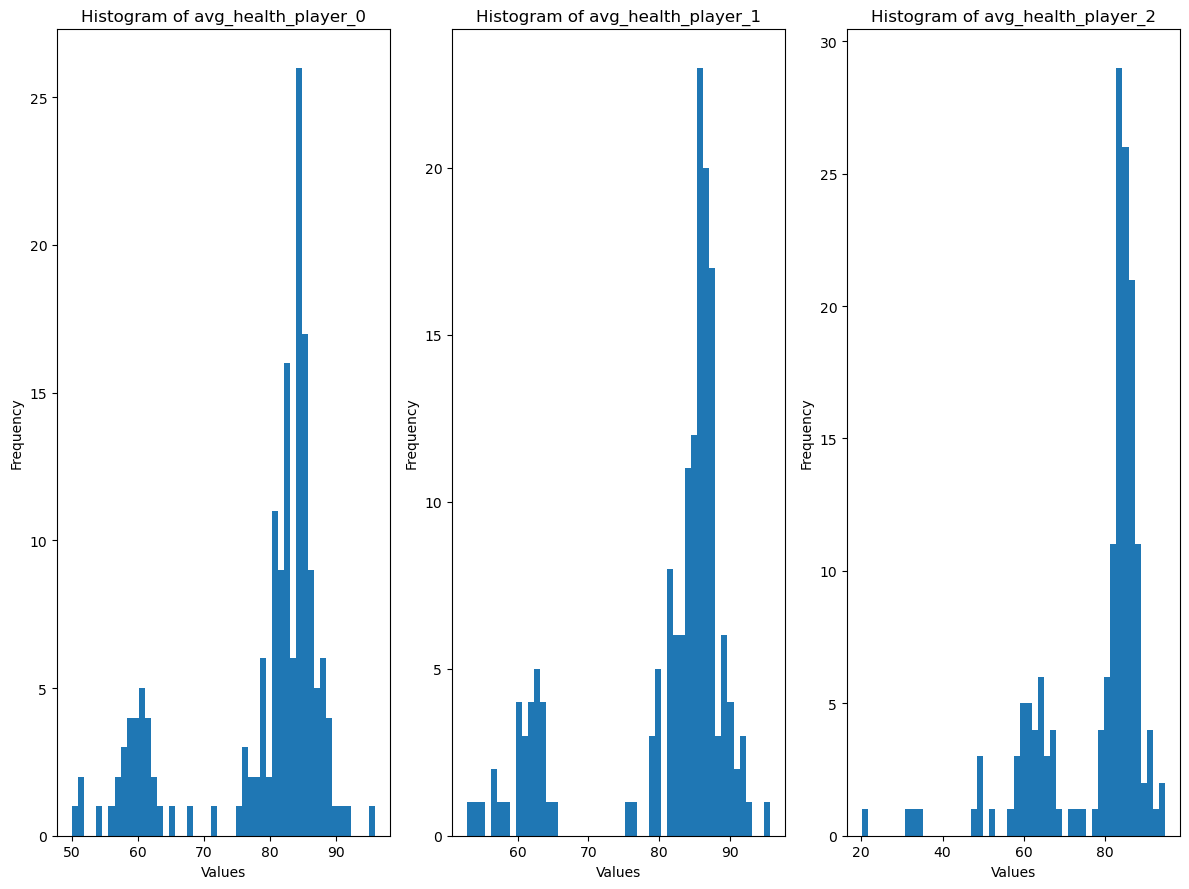

In [35]:
import matplotlib.pyplot as plt

columns = ['avg_health_player_0','avg_health_player_1','avg_health_player_2']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(result[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [36]:
import matplotlib.pyplot as plt

columns = ['avg_health_player_3','avg_health_player_4','avg_health_team']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(result[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [65]:
# dropping these cols b/c we dont get these events for opponents or teammates
# but we have to look for the active player and specifcally not drop that col
active_player = int(result['active_player'].iloc[0])

cols_to_drop = []

for i in range(1, 10):
    if i != active_player:
        cols_to_drop.extend([
            f'avg_ability_charges_1_player_{i}',
            f'avg_ability_charges_2_player_{i}',
            f'avg_ability_charges_3_player_{i}',
            f'avg_ability_charges_4_player_{i}',
            f'avg_loadout_value_player_{i}',
            f'avg_ammo_reserve_player_{i}',
            f'avg_ammo_mag_player_{i}',
            f'avg_credits_player_{i}',
            f'avg_shield_player_{i}'
        ])

result = result.drop(cols_to_drop, axis=1, errors='ignore')

In [66]:
result

active_player  round_num  time_bin  avg_health_player_0  \
0             1          7         0            50.000000   
1             1          8         0            19.312500   
2             1          9         0            18.500000   
3             1         10         0            22.266667   
4             1         11         0            25.200000   
5             1         12         0           100.000000   
6             1         13         0            50.000000   
7             1         14         0            26.000000   
8             1         15         0            50.000000   

   avg_health_player_1  avg_health_player_2  avg_health_player_3  \
0            50.000000            90.909091            93.000000   
1           100.000000            89.812500            84.400000   
2           100.000000            92.647059            72.125000   
3            88.500000            96.250000            84.400000   
4            92.333333            96.500000            68.714286   
5            42.000000            97.894737            57.419355   
6           100.000000            97.214286            82.266667   
7            50.000000            97.650000            52.970588   
8            54.250000            96.800000            88.375000   

   avg_health_player_4  avg_health_team  avg_shield_player_0  ...  \
0            94.800000        90.580645                  NaN  ...   
1            95.375000        69.196429                  NaN  ...   
2            94.875000        78.360000                  NaN  ...   
3            95.666667        70.795918                  NaN  ...   
4            91.142857        81.804348                  NaN  ...   
5            95.000000        75.913043                  NaN  ...   
6            91.450000        88.923077                  NaN  ...   
7            45.777778        57.314286                  NaN  ...   
8            88.105263        85.745098                  NaN  ...   

   avg_ability_charges_1_team  avg_ability_charges_2_player_0  \
0                         NaN                             NaN   
1                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
4                         NaN                             NaN   
5                         NaN                             NaN   
6                         NaN                             NaN   
7                         NaN                             NaN   
8                         NaN                             NaN   

   avg_ability_charges_2_player_1  avg_ability_charges_2_team  \
0                             NaN                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   
3                             NaN                         NaN   
4                             NaN                         NaN   
5                             NaN                         NaN   
6                             NaN                         NaN   
7                             NaN                         NaN   
8                             NaN                         NaN   

   avg_ability_charges_3_player_0  avg_ability_charges_3_player_1  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5                             NaN                             NaN   
6                             NaN                             NaN   
7                             NaN                             NaN   
8                             NaN                             NaN   

   avg_ability_charges_3_t

In [20]:
# # Merge the dataframes
result_df = pd.merge(result, overall_round_df, left_on='round_num', right_on='round_num', how='left') 

In [21]:
result_df

round_num  time_bin  avg_health_player_0  avg_health_player_1  \
0          7         0            50.000000            50.000000   
1          8         0            19.312500           100.000000   
2          9         0            18.500000           100.000000   
3         10         0            22.266667            88.500000   
4         11         0            25.200000            92.333333   
5         12         0           100.000000            42.000000   
6         13         0            50.000000           100.000000   
7         14         0            26.000000            50.000000   
8         15         0            50.000000            54.250000   

   avg_health_player_2  avg_health_player_3  avg_health_player_4  \
0            90.909091            93.000000            94.800000   
1            89.812500            84.400000            95.375000   
2            92.647059            72.125000            94.875000   
3            96.250000            84.400000            95.666667   
4            96.500000            68.714286            91.142857   
5            97.894737            57.419355            95.000000   
6            97.214286            82.266667            91.450000   
7            97.650000            52.970588            45.777778   
8            96.800000            88.375000            88.105263   

   avg_health_player_5  avg_health_player_6  avg_health_player_7  ...  \
0                  NaN                  NaN                  NaN  ...   
1                  NaN                  NaN                  NaN  ...   
2                  NaN                  NaN                  NaN  ...   
3                  NaN                  NaN                  NaN  ...   
4                  NaN                  NaN                  NaN  ...   
5                  NaN                  NaN                  NaN  ...   
6                  NaN                  NaN                  NaN  ...   
7                  NaN                  NaN                  NaN  ...   
8                  NaN                  NaN                  NaN  ...   

   ult_used  ally_side  buy_start round_end  round_won ally_score  \
0     False   attacker     -25276    124802       True          4   
1     False   attacker     124802    204402       True          5   
2     False   attacker     204402    304570       True          6   
3     False   attacker     304570    369242       True          7   
4     False   attacker     369242    448998       True          8   
5     False   defender     448998    561796       True          9   
6     False   defender     561796    622600       True         10   
7     False   defender     622600    716800       True         11   
8     False   defender     716800    844400       True         12   

   round_start  round_scored  spike_planted  opponent_score  
0         4723        117802          False               3  
1       154802        197402          False               3  
2       234402        297570           True               3  
3       334570        362242          False               3  
4       399242        441998          False               3  
5       493998        554796           True               3  
6       591796        615600          False               3  
7       652600        709800          False               3  
8       746800        837400           True               3  

[9 rows x 24 columns]

In [23]:
int(result['active_player'].iloc[0])

KeyError: 'active_player'

In [ ]:
health_to_drop = [f'avg_health_player_{i}' for i in range(1, 10) if i != int(result[active_player_column].iloc[0])]

In [23]:
active_player_column = 'active_player'

col_to_drop = [f'avg_health_player_{i}' for i in range(1, 10) if i != int(result[active_player_column].iloc[0])]
result = result.drop(columns=[col for col in cols_to_drop if col in result.columns])




# dropping these cols b/c we dont get health data for the opponents
result.drop(columns = ['avg_health_player_5','avg_health_player_6', 'avg_health_player_7', 'avg_health_player_8', 'avg_health_player_9'])
# dropping these cols b/c we dont get these events for opponents or teammates
# but we have to look for the active player and specifcally not drop that col
active_player_column = 'active_player'
event_types = ['shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
                'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']

col_to_drop = [f'avg_ability_charges_4_player_{i}' for i in range(1, 10) if i != int(result[active_player_column].iloc[0])]
result = result.drop(columns=[col for col in cols_to_drop if col in result.columns])





KeyError: 'active_player'

In [55]:
# Creating new DF to expand the rows/cols for rounds
normalized_df_overall_round = pd.DataFrame()
normalized_df_time_round = pd.DataFrame()
df_time_round_list = []

for i, row in normalized_df_chars.iterrows():
    overall_round_info = row['round_info']
    time_round_info = row['rounds']
    active_player = row['player']
    
     for round_num in overall_round_info.keys():
        overall_round_dict = overall_round_info[round_num]
        overall_round_df = pd.DataFrame(round_info_dict, index=[0])
        
        time_round_dict = time_round_info[round_num] if round_num in time_round_info else {}
        time_round_df = pd.DataFrame(time_round_dict, index=[0])
        combined_df = pd.concat([round_info_df, time_round_df], axis=1)
    
    for round_num, time_round_dict in time_round_info.items():
        for event_type, event_data in time_round_dict.items():
            '''
            'shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
            'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4' 
            follow this structure:
    
            [[time, value]]
    
            I assume that this is only for the active player. 
            For this, I will not parse 'inv_state', 'map_region', 'firing_state', 'inv_secondary', 'spike_planted' 
            since they are categorical/boolean (for now).
            '''
            # if event_type in ['shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
            # 'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']:
            #     for timestamp, value in event_data:
            #         df_time_round_list.append({
            #             "round": round_id,
            #             "event_type": event_type,
            #             "player_id": active_player,
            #             "timestamp": timestamp,
            #             "value": value
            #         })
            
            '''
            'alive', 'health', 'ult_state' follow this structure:
    
            [player 0: [time, value]
            player 1: [time, value]]
            etc... 
    
            I assume that this is the health/ult_state/alive-ness of the active player and the allies.
            For this, I will not parse 'alive', 'ult_state' since they are categorical/boolean (for now).
            '''
            if event_type in ['health']:
                for player_id, player_data in event_data.items():
                    for timestamp, value in player_data:
                        df_time_round_list.append({
                            "round": round_num,
                            "event_type": event_type,
                            "player_id": player_id,
                            "timestamp": timestamp,
                            "value": value
                        })
#             if event_type in ['elims']:
#                 for timestamp, info_elims in event_data:
#                     df_time_round_list.append({
#                         "round": round_num,
#                         "event_type": "elims",
#                         "player_id": info_elims['source'],
#                         "timestamp": timestamp,
#                         "value": 1
#                     })
#                     df_time_round_list.append({
#                         "round": round_num,
#                         "event_type": "deaths",
#                         "player_id": info_elims['target'],
#                         "timestamp": timestamp,
#                         "value": 1
#                     })
                    

normalized_df_time_round = pd.DataFrame(df_time_round_list)
        

In [56]:
normalized_df_time_round

round event_type player_id  timestamp  value
0          7     health         0          0    100
1          7     health         0      29600      0
2          7     health         1          0    100
3          7     health         1      53800      0
4          7     health         2          0    100
...      ...        ...       ...        ...    ...
705535    19     health         4    1633173     25
705536    19     health         4    1633573     71
705537    19     health         4    1634773     82
705538    19     health         4    1635573     68
705539    19     health         4    1636573     86

[705540 rows x 5 columns]

In [14]:
normalized_df_overall_round

score ult_used ally_side  buy_start  round_end round_won  ally_score  \
0      4-3    False  attacker     -25276     124802      True           4   
1      5-3    False  attacker     124802     204402      True           5   
2      6-3    False  attacker     204402     304570      True           6   
3      7-3    False  attacker     304570     369242      True           7   
4      8-3    False  attacker     369242     448998      True           8   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  ...  ally0_character  \
0            4723        117802         False  ...          phoenix   
1          154802        197402         False  ...          phoenix   
2          234402        297570          True  ...          phoenix   
3          334570        362242         False  ...          phoenix   
4          399242        441998         False  ...          phoenix   
...           ...           ...           ...  ...              ...   
8041      1313681       1368064           NaN  ...             yoru   
8042      1405064       1432659           NaN  ...             yoru   
8043      1469659       1497595           NaN  ...             yoru   
8044      1534595       1593300           NaN  ...             yoru   
8045      1630300       1662369           NaN  ...             yoru   

     ally1_character ally2_character ally3_character ally4_character  \
0               jett           gekko          cypher           astra   
1               jett           gekko          cypher           astra   
2               jett           gekko          cypher           astra   
3               jett           gekko          cypher           astra   
4               jett           gekko          cypher           astra   
...              ...             ...             ...             ...   
8041         killjoy            sage           viper          breach   
8042         killjoy            sage           viper          breach   
8043         killjoy            sage           viper          breach   
8044         killjoy            sage           viper          breach   
8045         killjoy            sage           viper          breach   

     opponent5_character opponent6_character opponent7_character  \
0                 harbor               astra                jett   
1                 harbor               astra                jett   
2                 harbor               astra                jett   
3                 harbor               astra                jett   
4                 harbor               astra                jett   
...                  ...                 ...                 ...   
8041                fade              harbor                yoru   
8042                fade              harbor                yoru   
8043                fade              harbor                yoru   
8044                fade              harbor                yoru   
8045                fade              harbor                yoru   

     opponent8_character opponent9_character  
0                phoenix             killjoy  
1                phoenix             killjoy  
2                phoenix             killjoy  
3                phoenix             killjoy  
4                phoenix             killjoy  
...                  ...                 ...  
8041             killjoy              breach  
8042             killjoy              breach  
8043             killjoy              breach  
8044             killjoy              breach  
8045             killjoy    

In [17]:
# Creating new DF to expand the rows/cols for rounds

df_time_round_list = []

for i, row in normalized_df_chars.iterrows():
    overall_round_info = row['round_info']
    time_round_info = row['rounds']
    active_player = row['player']
    
    for round_num, round_info_dict in time_round_info.items():
        for event_type, event_data in round_info_dict.items():
            '''
            'shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
            'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4' 
            follow this structure:
    
            [[time, value]]
    
            I assume that this is only for the active player. 
            For this, I will not parse 'inv_state', 'map_region', 'firing_state', 'inv_secondary', 'spike_planted' 
            since they are categorical/boolean (for now).
            '''
            # if event_type in ['shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
            # 'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']:
            #     for timestamp, value in event_data:
            #         df_time_round_list.append({
            #             "round": round_id,
            #             "event_type": event_type,
            #             "player_id": active_player,
            #             "timestamp": timestamp,
            #             "value": value
            #         })
            
            '''
            'alive', 'health', 'ult_state' follow this structure:
    
            [player 0: [time, value]
            player 1: [time, value]]
            etc... 
    
            I assume that this is the health/ult_state/alive-ness of the active player and the allies.
            For this, I will not parse 'alive', 'ult_state' since they are categorical/boolean (for now).
            '''
            if event_type in ['health']:
                for player_id, player_data in event_data.items():
                    for timestamp, value in player_data:
                        df_time_round_list.append({
                            "round": round_num,
                            "event_type": event_type,
                            "player_id": player_id,
                            "timestamp": timestamp,
                            "value": value
                        })
            if event_type in ['elims']:
                for timestamp, info_elims in event_data:
                    df_time_round_list.append({
                        "round": round_num,
                        "event_type": "elims",
                        "player_id": info_elims['source'],
                        "timestamp": timestamp,
                        "value": 1
                    })
                    df_time_round_list.append({
                        "round": round_num,
                        "event_type": "deaths",
                        "player_id": info_elims['target'],
                        "timestamp": timestamp,
                        "value": 1
                    })
                    

normalized_df_time_round = pd.DataFrame(df_time_round_list)

In [18]:
normalized_df_time_round

round event_type player_id  timestamp  value
0          7      elims         4      42400      1
1          7     deaths         9      42400      1
2          7      elims         6      54000      1
3          7     deaths         1      54000      1
4          7      elims         3      57600      1
...      ...        ...       ...        ...    ...
808281    19     health         4    1633173     25
808282    19     health         4    1633573     71
808283    19     health         4    1634773     82
808284    19     health         4    1635573     68
808285    19     health         4    1636573     86

[808286 rows x 5 columns]

In [24]:
import numpy as np
df_binned = pd.DataFrame()

# Group the data by round
df_binned = pd.DataFrame()
for round_id, group in normalized_df_time_round.groupby("round"):
    round_length = group["timestamp"].max()
    # CHANGE THE BINS HERE
    bin_edges = np.linspace(0, round_length, 2)
    group["time_bin"] = pd.cut(group["timestamp"], bins=bin_edges, labels=False, include_lowest=True)
    df_binned = pd.concat([df_binned, group])

df_binned["time_bin"] = df_binned["time_bin"].astype(int)

In [25]:
df_binned

round event_type player_id  timestamp  value  time_bin
632        0      elims         3     151200      1         0
633        0     deaths         8     151200      1         0
634        0      elims         9     156800      1         0
635        0     deaths         4     156800      1         0
636        0      elims         9     161600      1         0
...      ...        ...       ...        ...    ...       ...
806109     9     health         4     826483     82         0
806110     9     health         4     827082     89         0
806111     9     health         4     827482     82         0
806112     9     health         4     830082     46         0
806113     9     health         4     830482     86         0

[808286 rows x 6 columns]

In [26]:
# Define a list of event types
event_types = ['shield', 'credits', 'ammo_mag', 'ammo_reserve', 'loadout_value', 
               'ability_charges_1', 'ability_charges_2', 'ability_charges_3', 'ability_charges_4',
               'health', 'elims', 'deaths']

# Create a dictionary to store grouped dataframes
grouped_dfs = {}
players = [0, 1, 2, 3, 4,5,6,7,8,9]

# Loop over event types to group and aggregate
for event in event_types:
    event_df = df_binned[df_binned['event_type'] == event]
    for player in players:
        player_df = event_df[event_df['player_id'] == player]
        grouped_dfs[f'{event}_player_{player}'] = player_df.groupby(['round', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_player_{player}'})
    grouped_dfs[f'{event}_team'] = event_df.groupby(['round', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_team'})

# List of all keys (i.e., event_player and event_team combinations)
all_keys = list(grouped_dfs.keys())

# Merge the results
result = grouped_dfs[all_keys[0]]

for key in all_keys[1:]:
    result = pd.merge(result, grouped_dfs[key], on=['round', 'time_bin'], how='outer')

# Fill NaN with 0
result.fillna(0, inplace=True)

In [27]:

result

avg_shield_player_0  avg_shield_player_1  avg_shield_player_2  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
5                   0.0                  0.0                  0.0   
6                   0.0                  0.0                  0.0   
7                   0.0                  0.0                  0.0   
8                   0.0                  0.0                  0.0   
9                   0.0                  0.0                  0.0   
10                  0.0                  0.0                  0.0   
11                  0.0                  0.0                  0.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  0.0                  0.0                  0.0   
16                  0.0                  0.0                  0.0   
17                  0.0                  0.0                  0.0   
18                  0.0                  0.0                  0.0   
19                  0.0                  0.0                  0.0   
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  0.0                  0.0                  0.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   
25                  0.0                  0.0                  0.0   
26                  0.0                  0.0                  0.0   
27                  0.0                  0.0                  0.0   
28                  0.0                  0.0                  0.0   
29                  0.0                  0.0                  0.0   
30                  0.0                  0.0                  0.0   
31                  0.0                  0.0                  0.0   
32                  0.0                  0.0                  0.0   
33                  0.0                  0.0                  0.0   
34                  0.0                  0.0                  0.0   
35                  0.0                  0.0                  0.0   
36                  0.0                  0.0                  0.0   
37                  0.0                  0.0                  0.0   

    avg_shield_player_3  avg_shield_player_4  avg_shield_player_5  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
5                   0.0                  0.0                  0.0   
6                   0.0                  0.0                  0.0   
7                   0.0                  0.0                  0.0   
8                   0.0                  0.0                  0.0   
9                   0.0                  0.0                  0.0   
10                  0.0                  0.0                  0.0   
11                  0.0                  0.0                  0.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  0.0                  0.0                  0.0   
16                  0.0                  0.0                  0.0   
17                  0.0                  0.0                  0.0   
1

In [47]:
import numpy as np
'''
'elims_count', 'assists_count', 'assisted_count' follow this structure:

[time, count for the round?, count for the match?]

I dont really get what this is, I will get these myself for now.
'''

data_dict = example

# Creating an empty DataFrame
df_round_example = pd.DataFrame()

df_list = []

active_player = 1

for round_id, round_data in data_dict.items():
    for event_type, event_data in round_data.items():
        '''
        'shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
        'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4' 
        follow this structure:

        [[time, value]]

        I assume that this is only for the active player. 
        For this I will not parse 'inv_state', 'map_region', 'firing_state', 'inv_secondary', 'spike_planted' 
        since they are categorical/boolean (for now).
        '''
#         if event_type in ['shield', 'credits', 'ammo_mag', 'ammo_reserve','loadout_value', 
#         'ability_charges_1', 'ability_charges_2','ability_charges_3', 'ability_charges_4']:
#             for timestamp, value in event_data:
#                 df_list.append({
#                     "round": round_id,
#                     "event_type": event_type,
#                     "player_id": active_player,
#                     "timestamp": timestamp,
#                     "value": value
#                 })
        '''
        'alive', 'health', 'ult_state' follow this structure:

        [player 0: [time, value]
        player 1: [time, value]]
        etc... 

        I assume that this is the health/ult_state/alive-ness of the active player and the allies.
        For this I will not parse 'alive', 'ult_state' since they are categorical/boolean (for now).
        '''
        if event_type in ['health']:
            for player_id, player_data in event_data.items():
                for timestamp, value in player_data:
                    df_list.append({
                        "round": round_id,
                        "event_type": event_type,
                        "player_id": player_id,
                        "timestamp": timestamp,
                        "value": value
                    })
        if event_type in ['elims']:
            for timestamp, info_elims in event_data:
                df_list.append({
                    "round": round_id,
                    "event_type": "elims",
                    "player_id": info_elims['source'],
                    "timestamp": timestamp,
                    "value": 1
                })
                df_list.append({
                    "round": round_id,
                    "event_type": "deaths",
                    "player_id": info_elims['target'],
                    "timestamp": timestamp,
                    "value": 1
                })



df_round_example = pd.DataFrame(df_list)

df_binned = pd.DataFrame()

# Group the data by round
df_binned = pd.DataFrame()
for round_id, group in df_round_example.groupby("round"):
    round_length = group["timestamp"].max()
    bin_edges = np.linspace(0, round_length, 3)
    group["time_bin"] = pd.cut(group["timestamp"], bins=bin_edges, labels=False, include_lowest=True)
    df_binned = pd.concat([df_binned, group])

df_binned["time_bin"] = df_binned["time_bin"].astype(int)

# Define a list of event types
event_types = ['shield', 'credits', 'ammo_mag', 'ammo_reserve', 'loadout_value', 
               'ability_charges_1', 'ability_charges_2', 'ability_charges_3', 'ability_charges_4',
               'health', 'elims', 'deaths']

# Create a dictionary to store grouped dataframes
grouped_dfs = {}
players = [0, 1, 2, 3, 4,5,6,7,8,9]

# Loop over event types to group and aggregate
for event in event_types:
    event_df = df_binned[df_binned['event_type'] == event]
    for player in players:
        player_df = event_df[event_df['player_id'] == player]
        grouped_dfs[f'{event}_player_{player}'] = player_df.groupby(['round', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_player_{player}'})
    grouped_dfs[f'{event}_team'] = event_df.groupby(['round', 'time_bin']).agg({'value': np.mean}).reset_index().rename(columns={'value': f'avg_{event}_team'})

# List of all keys (i.e., event_player and event_team combinations)
all_keys = list(grouped_dfs.keys())

# Merge the results
result = grouped_dfs[all_keys[0]]

for key in all_keys[1:]:
    result = pd.merge(result, grouped_dfs[key], on=['round', 'time_bin'], how='outer')

# Fill NaN with 0
result.fillna(0, inplace=True)

result


avg_shield_player_0  avg_shield_player_1  avg_shield_player_2  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   avg_shield_player_3  avg_shield_player_4  avg_shield_player_5  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   avg_shield_player_6  avg_shield_player_7  avg_shield_player_8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   avg_shield_player_9  ...  avg_deaths_player_1  avg_deaths_player_2  \
0                  0.0  ...                  0.0                  0.0   
1                  0.0  ...                  0.0                  0.0   
2                  0.0  ...                  0.0                  0.0   
3                  0.0  ...                  0.0                  0.0   
4                  0.0  ...                  0.0                  0.0   
5                  0.0  ...                  0.0                  0.0   
6                  0.0  ...                  0.0                  0.0   
7                  0.0  ...                  0.0                  0.0   
8                  0.0  ...                  0.0                  0.0   
9                  0.0  ...                  0.0                  0.0   

   avg_deaths_player_3  avg_deaths_player_4  avg_deaths_player_5  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   
5                  0.0                  0.0                  0.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   avg_deaths_player_6  avg_deaths_player_7  avg_deaths_player_8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   

In [48]:
result.columns

Index(['avg_shield_player_0', 'avg_shield_player_1', 'avg_shield_player_2',
       'avg_shield_player_3', 'avg_shield_player_4', 'avg_shield_player_5',
       'avg_shield_player_6', 'avg_shield_player_7', 'avg_shield_player_8',
       'avg_shield_player_9',
       ...
       'avg_deaths_player_1', 'avg_deaths_player_2', 'avg_deaths_player_3',
       'avg_deaths_player_4', 'avg_deaths_player_5', 'avg_deaths_player_6',
       'avg_deaths_player_7', 'avg_deaths_player_8', 'avg_deaths_player_9',
       'avg_deaths_team'],
      dtype='object', length=134)

In [49]:
df_binned[df_binned['round'] == '7']

round event_type player_id  timestamp  value  time_bin
0      7      elims         4      42400      1         1
1      7     deaths         9      42400      1         1
2      7      elims         6      54000      1         1
3      7     deaths         1      54000      1         1
4      7      elims         3      57600      1         1
..   ...        ...       ...        ...    ...       ...
63     7     health         4      69800     96         1
64     7     health         4      76400     93         1
65     7     health         4      77000     96         1
66     7     health         4      82800    100         1
67     7     health         4      83200     96         1

[68 rows x 6 columns]

In [115]:
df_round_example["timestamp"].max()

827400

In [112]:
df_round_example

Empty DataFrame
Columns: []
Index: []

In [61]:
# goes through each of the rounds and gets the data for that round
for round_id, round_data in data_dict.items():
    # goes through each of the events and gets the data for that event
    for event_type, event_data in round_data.items():
        # getting these specific events
        if event_type in ["alive", "health", "elims", "ult_state", "phases"]:
            if event_type == "elims":
                # goes through all the timestampes for, gets the related data
                for timestamp, info_elims in event_data:
                    # for each of the 
                    for key, value in info_elims.items():
                        df = df.conact({
                            "round": round_id,
                            "event_type": event_type,
                            "key": key,
                            "timestamp": timestamp,
                            "value": value
                        }, ignore_index=True)
            else:   
                for player_id, player_data in event_data.items():
                    for timestamp, value in player_data:
                        df = df.append({
                            "round": round_id,
                            "event_type": event_type,
                            "player_id": player_id,
                            "timestamp": timestamp,
                            "value": value
                        }, ignore_index=True)

# Converting the timestamps to seconds and then dividing by the length of a round to get the relative time
round_length = max(df["timestamp"])  # Assuming the max timestamp corresponds to the round length
df["relative_time"] = df["timestamp"] // (round_length // 10)

/var/folders/zb/q_qnmjvn0d3gl5wfj4qzpq_40000gn/T/ipykernel_83340/344761995.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/zb/q_qnmjvn0d3gl5wfj4qzpq_40000gn/T/ipykernel_83340/344761995.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/zb/q_qnmjvn0d3gl5wfj4qzpq_40000gn/T/ipykernel_83340/344761995.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/zb/q_qnmjvn0d3gl5wfj4qzpq_40000gn/T/ipykernel_83340/344761995.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/zb/q_qnmjvn0d3gl5wfj4qzpq_40000gn/T/ipykernel_83340

AttributeError: 'list' object has no attribute 'items'

In [ ]:
import json
import pandas as pd
import numpy as np

# Assuming your JSON data is stored in a string called data_str
data_dict = json.loads(example)

# Creating an empty DataFrame
df = pd.DataFrame()

# Extracting relevant data from each round
for round_id, round_data in data_dict.items():
    for event_type, event_data in round_data.items():
        if event_type in ["alive", "health", "elims", "ult_state", "phases"]:
            # Flattening the event data and adding it to the DataFrame
            for player_id, player_data in event_data.items():
                for timestamp, value in player_data:
                    df = df.append({
                        "round": round_id,
                        "event_type": event_type,
                        "player_id": player_id,
                        "timestamp": timestamp,
                        "value": value
                    }, ignore_index=True)

# Converting the timestamps to seconds and then dividing by the length of a round to get the relative time
df["relative_time"] = df["timestamp"] // (round_length // 10)


## Timeseries data approaches

### Aggregation
Sort of most obvious approach... computing aggregate statistics like average health, total damage dealt, and number of eliminations in that time period. Already doing this to some extent, probably makes the most sense to start with round and then get more granular (or maybe start, middle, end per round). Loses information (like exact times things happened) but its somewhat unclear how much this will matter given the fact that I am not trying to predict the next event, I am trying to predict an overal characteristc (my sense is this is different than some other time-series problems like predicting weather or stock markets). 

### Feature Engineering
Create features that capture interesting events
- binary feature indicating whether a player's health has dropped below a certain threshold
- spike has been planted

Create lagged features
- change in health over the past few seconds

### Windowing
Define a "window" of a certain length (e.g., the past 5 seconds), and use the data in that window to predict the next event... I feel like this is not as relevent?

### Change Points Detection: 
Identify specific points where the properties of the series change. Could be a different way to segment the time series, like post spike plant or post player elimination. 

## Checking for other imbalances - categorical
There exist imbalances, there are more wins than losses, more matches from certain maps, more matches from certain characters, more matches from certain users.

In [13]:
unique_ids = df['user_id'].value_counts()

unique_ids_df = unique_ids.reset_index()
unique_ids_df.columns = ['user_id', 'count']
unique_ids_df

user_id  count
0      1012    106
1      1010     94
2      1013     92
3      1011     27
4      1009     23
5      1564     22
6       999     21
7       997     21
8      1001     14
9      1016     14
10     1017     14
11     1007     13
12     1014     12
13     1005      9
14     1000      8
15      996      6
16     1006      6
17     1004      5
18      998      4
19      994      4
20     1577      3
21     1002      3
22      995      3
23     2469      2
24     1018      2
25     1008      1

In [14]:
unique_maps = df['map_id'].value_counts()

unique_maps_df = unique_maps.reset_index()
unique_maps_df.columns = ['map_id', 'count']

unique_maps_df

map_id  count
0     134    125
1     136     74
2      32     59
3      28     58
4      33     55
5      34     55
6      30     45
7     137     43
8      31     10
9      29      5

In [15]:
unique_chars = df['character_id'].value_counts()

unique_chars_df = unique_chars.reset_index()
unique_chars_df.columns = ['character_id', 'count']

unique_chars_df

character_id  count
0             44     69
1             42     63
2             37     62
3             39     46
4             36     30
5             49     30
6             48     29
7             46     26
8             45     24
9             38     21
10            40     20
11          1411     18
12            34     15
13            43     15
14            50     14
15            35     13
16          1407     10
17            52      8
18            47      7
19            41      6
20            51      3

## histograms - numerical
- "positive" things: 'match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned'


- "negative" things: 'match_length','seconds_dead','deaths''was_assisted','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent'

- note that I am not including score here, 2 reasons:
1. Score is obviously going to determine the outcome of a match, and its not user specific (team specific)
2. Also not sure how to deal with it since its a tuple, do I split it into 2 cols?

### thoughts
- some of these distributions are bimodal? why are there no "medium length" games or "medium shielders"
- seems like there are a lot of games where "nothing happends" ie there arent any elims, deaths, etc.

In [16]:
import matplotlib.pyplot as plt

columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [19]:
match_sort_df = df.sort_values(by='match_length', ascending=True)

match_sort_df

index    id  map_id                       created_at result  score  \
366    371  2704     134 2023-03-28 01:37:05.228000+00:00   loss  12-13   
326    331  2764      33 2023-03-28 03:04:54.447000+00:00    win   13-8   
436    441  2591     136 2023-03-27 20:53:22.175000+00:00    win    1-0   
372    377  2696     136 2023-03-28 01:31:45.527000+00:00   loss   5-13   
300    305  2800      32 2023-03-28 03:41:22.716000+00:00   draw    9-9   
..     ...   ...     ...                              ...    ...    ...   
115    119  4465      34 2023-05-05 03:50:46.394000+00:00   draw  13-13   
111    115  4469     134 2023-05-05 04:02:58.039000+00:00   loss  10-13   
124    128  4449      33 2023-05-05 02:14:32.946000+00:00    win  13-10   
125    129  4446      33 2023-05-05 01:59:50.016000+00:00    win  13-10   
67      71  4531     134 2023-05-05 06:41:21.437000+00:00   draw  13-13   

     character_id  user_id  match_length  start_time  ...  wallbangs  \
366            44     1012         70001    17051383  ...        0.0   
326            36     1010         71007     5116484  ...        0.0   
436            48     1012         78000     8544000  ...        0.0   
372            48     1012         79002    14192318  ...        0.0   
300            38     1010         84008    24822349  ...        0.0   
..            ...      ...           ...         ...  ...        ...   
115            37     1011       4159008     4492008  ...        0.0   
111            45     1013       4304000     7343000  ...        0.0   
124            34     1011       4357008     1191002  ...        0.0   
125            34     1011       4357008     1191002  ...        0.0   
67             49     1013       4746011      344000  ...        0.0   

     first_bloods  seconds_dead  was_assisted  credits_spent  first_blooded  \
366           0.0           0.0           0.0            0.0            0.0   
326           0.0           0.0           0.0            0.0            0.0   
436           0.0           0.0           0.0         1000.0            0.0   
372           0.0           4.0           0.0         1450.0            0.0   
300           0.0           0.0           0.0            0.0            0.0   
..            ...           ...           ...            ...            ...   
115           5.0        2466.0           6.0        95200.0            2.0   
111           0.0         787.0           5.0        88150.0            4.0   
124           0.0        1443.0           0.0        48450.0            0.0   
125           0.0        1443.0           0.0        48450.0            0.0   
67            4.0         890.0           4.0       118377.0            2.0   

     seconds_alive  credits_earned  hp_damage_taken  shield_damage_taken  
366           15.0           650.0             39.0                 50.0  
326           65.0          2550.0              0.0                  0.0  
436           74.0          1300.0              0.0                  0.0  
372           57.0          3350.0            100.0                 50.0  
300            0.0          2550.0              0.0                  0.0  
..             ...             ...              ...                  ...  
115         1648.0         98200.0           2047.0                690.0  
111         2892.0         88750.0           3251.0               1151.0  
124          748.0         49000.0           2600.0                725.0  
125          748.0         49000.0           2600.0                725.0  
67          3752.0        124927.0           3523.0               1426.0  

[529 rows x 27 columns]

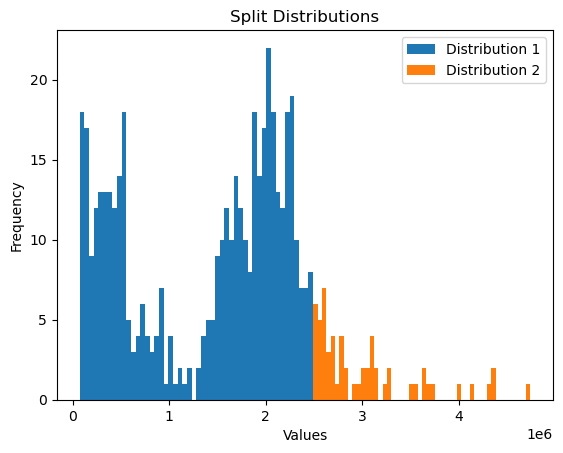

In [31]:
from scipy.signal import argrelextrema
import numpy as np

# Extract the bimodal distribution data as a NumPy array
data_match_length = df['match_length'].values

# local minima (dips) in the distribution
min_value = np.min(data_match_length)
separation_point = min_value + (np.max(data_match_length) - min_value) / 2

# separation point
separation_point = local_minima_values[np.argmax(local_minima_values)]

# Split the data based on the separation point
distribution1 = df[df['match_length'] <= separation_point]
distribution2 = df[df['match_length'] > separation_point]

# Visualize the split distributions
plt.hist(distribution1['match_length'], bins=50, label='Distribution 1')
plt.hist(distribution2['match_length'], bins=50, label='Distribution 2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Split Distributions')
plt.legend()
plt.show()

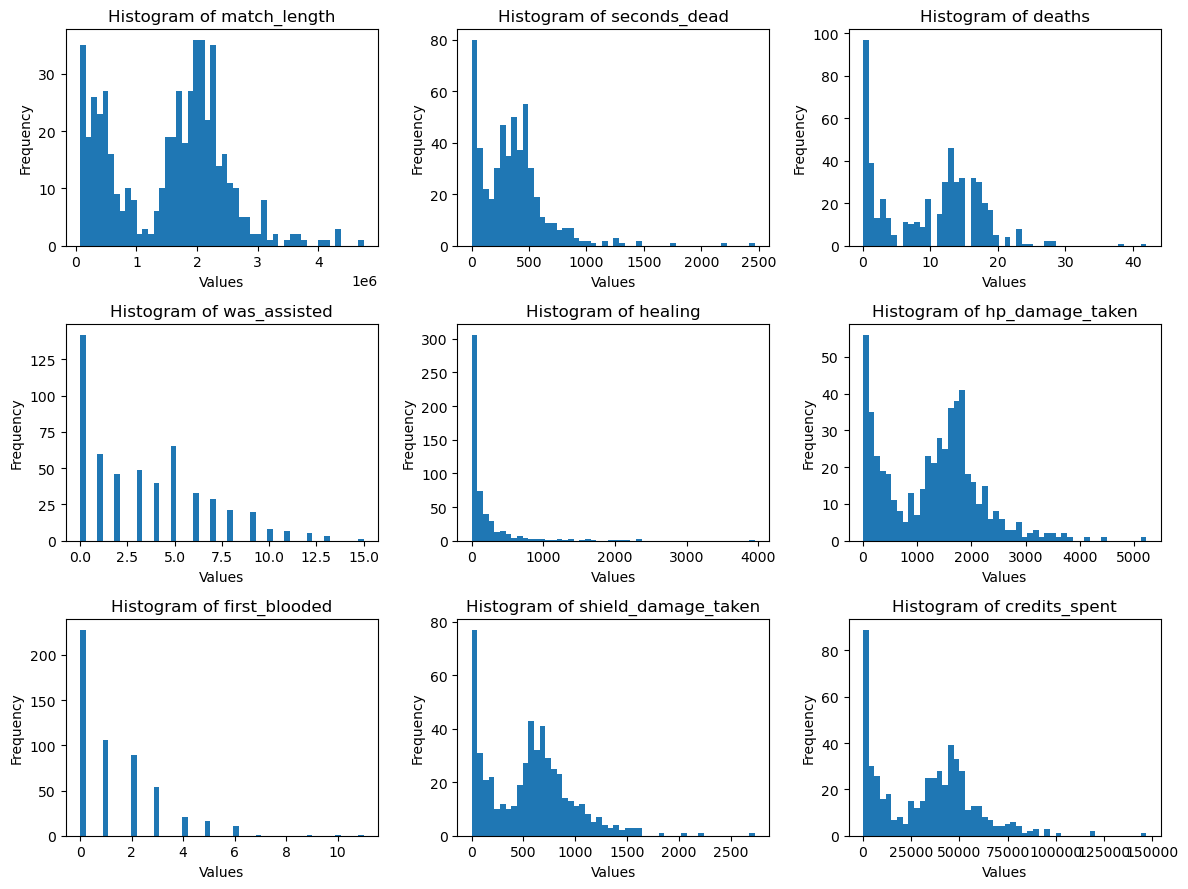

In [356]:
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column], bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

## win vs loss
- this is one of my target questions: is it possible/how easy is it to predict match outcome 
- try seeing the wins vs losses 
- b/c of the class imbalance, downsample to make the histograms comparable

### thoughts
- generally the features do not seem very seperable linearlly
- Some are a little seperable ("deaths"?), I def expected more clear distictions esp. when it comes to deaths/eliminations is that is a big part of what determines the game
- I also expected that players that are sheilding more, taking less damage, alive longer, longer matches, to generally be winning matches but that doesn't really seem to be the case

In [357]:
class_counts = df['result'].value_counts()
class_counts

win     334
loss    169
draw     26
Name: result, dtype: int64

In [358]:
# going to remove the draw for now
df_no_draw = df[df['result'] != 'draw']
df_no_draw_counts = df_no_draw['result'].value_counts()
df_no_draw_counts

win     334
loss    169
Name: result, dtype: int64

In [359]:
# downsampling for now
class_win = df_no_draw[df_no_draw['result'] == 'win']
class_loss = df_no_draw[df_no_draw['result'] == 'loss']

num_samples_class_win = len(class_win)
num_samples_class_loss = len(class_loss)

downsampled_class_win = class_win.sample(n=num_samples_class_loss, random_state=42)
downsampled_class_loss = class_loss

# Combine the downsampled classes into a new data frame
downsampled_df = pd.concat([downsampled_class_win, downsampled_class_loss])

downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
downsampled_df

id  map_id                       created_at result  score  \
0    4539     137 2023-05-05 06:59:27.978000+00:00    win   13-5   
1    1527      32 2023-03-01 15:31:27.897000+00:00   loss  18-20   
2    4527      34 2023-05-05 06:28:07.950000+00:00   loss  10-13   
3    4427     136 2023-05-05 01:03:37.605000+00:00    win   13-8   
4    4443      33 2023-05-05 01:51:28.638000+00:00   loss   6-13   
..    ...     ...                              ...    ...    ...   
333  4521     136 2023-05-05 06:14:04.835000+00:00   loss   5-13   
334  4570     134 2023-05-05 07:36:01.430000+00:00    win    5-3   
335  2710      34 2023-03-28 01:44:14.151000+00:00    win    7-2   
336  2780     136 2023-03-28 03:21:13.711000+00:00   loss    4-5   
337  1559      34 2023-03-01 18:13:08.706000+00:00    win   13-5   

     character_id  user_id  match_length  start_time  end_time  ...  \
0              36     1012       1803633     6789205   8592838  ...   
1              49      998       3748000           0   3748000  ...   
2              44     1012       2218000     6454000   8672000  ...   
3              51     1010       2146004    12119023  14265027  ...   
4              48     1012       1713000     9243000  10956000  ...   
..            ...      ...           ...         ...       ...  ...   
333            44     1016       1866005     5222014   7088019  ...   
334            44     1010       1014000    11187999  12201999  ...   
335            44     1012        326007    20744466  21070473  ...   
336            37     1010        161015    13574285  13735300  ...   
337            34      998        911000           0    911000  ...   

     wallbangs  first_bloods  seconds_dead  was_assisted  credits_spent  \
0          0.0           0.0         802.0           3.0        35050.0   
1          2.0          19.0         827.0          15.0        87642.0   
2          1.0           6.0         791.0           2.0        39750.0   
3          1.0           8.0         446.0           5.0        34400.0   
4          0.0           1.0         374.0           1.0        47150.0   
..         ...           ...           ...           ...            ...   
333        2.0           2.0         603.0           1.0        32700.0   
334        0.0           1.0         699.0           0.0           50.0   
335        0.0           0.0          90.0           0.0         4600.0   
336        0.0           0.0          26.0           0.0         1400.0   
337        2.0           3.0           5.0           7.0        13000.0   

     first_blooded  seconds_alive  credits_earned  hp_damage_taken  \
0              0.0          940.0         39600.0           2613.0   
1              6.0         2886.0         89192.0           3415.0   
2              0.0         1388.0         45250.0           2423.0   
3              4.0         1552.0         37150.0           1653.0   
4              1.0         1306.0         48650.0           1620.0   
..             ...            ...             ...              ...   
333            2.0         1111.0         32900.0           1855.0   
334            0.0          264.0           100.0           1134.0   
335            0.0          142.0         11550.0            295.0   
336            0.0           78.0          3400.0            100.0   
337            0.0          889.0         15600.0            472.0   

     shield_damage_taken  
0                 1202.0  
1                 2199.0  
2                 1184.0  
3                  955.0  
4                  659.0  
..                   ...  
333                575.0  
334                260.0  
335                128.0  
336                 25.0  
337                492.0  

[338 rows x 26 columns]

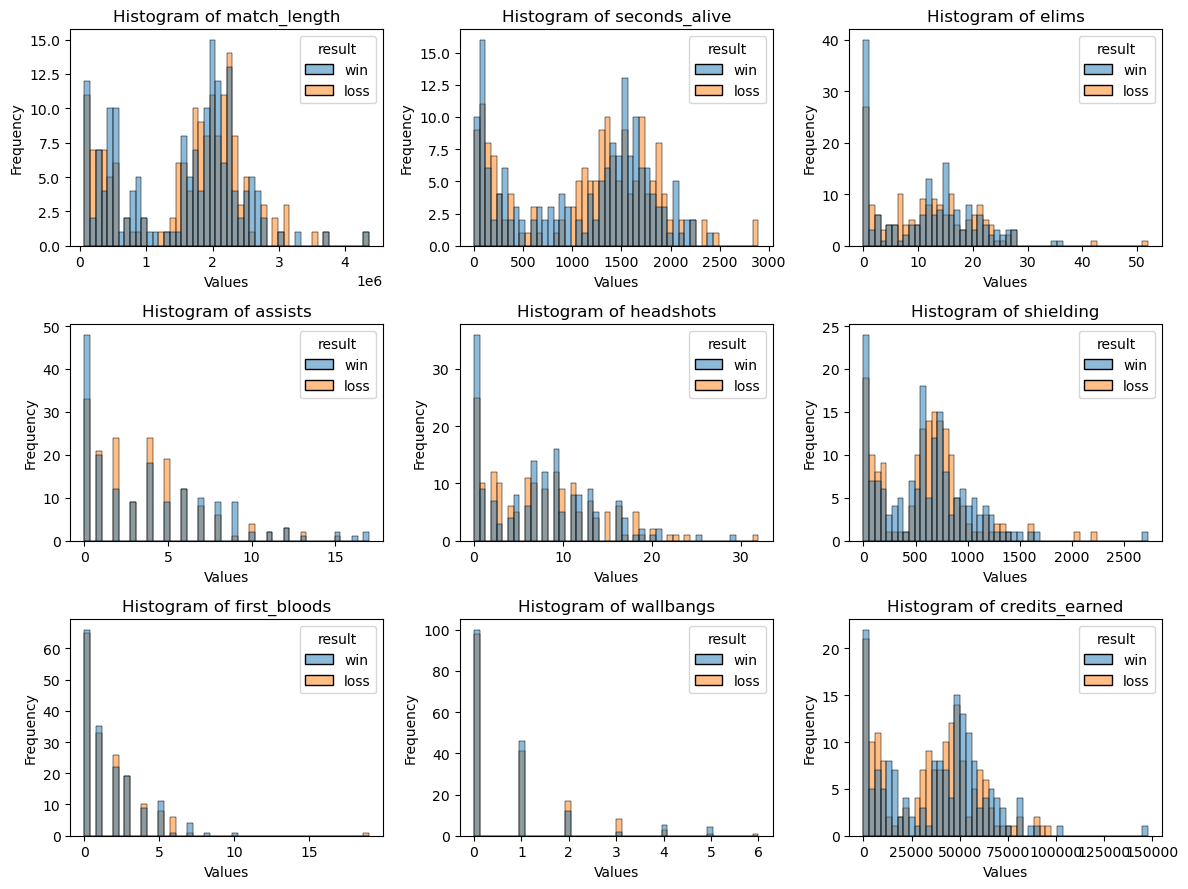

In [360]:
import seaborn as sns

# Specify the class label column
class_label = 'result'
columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=downsampled_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()


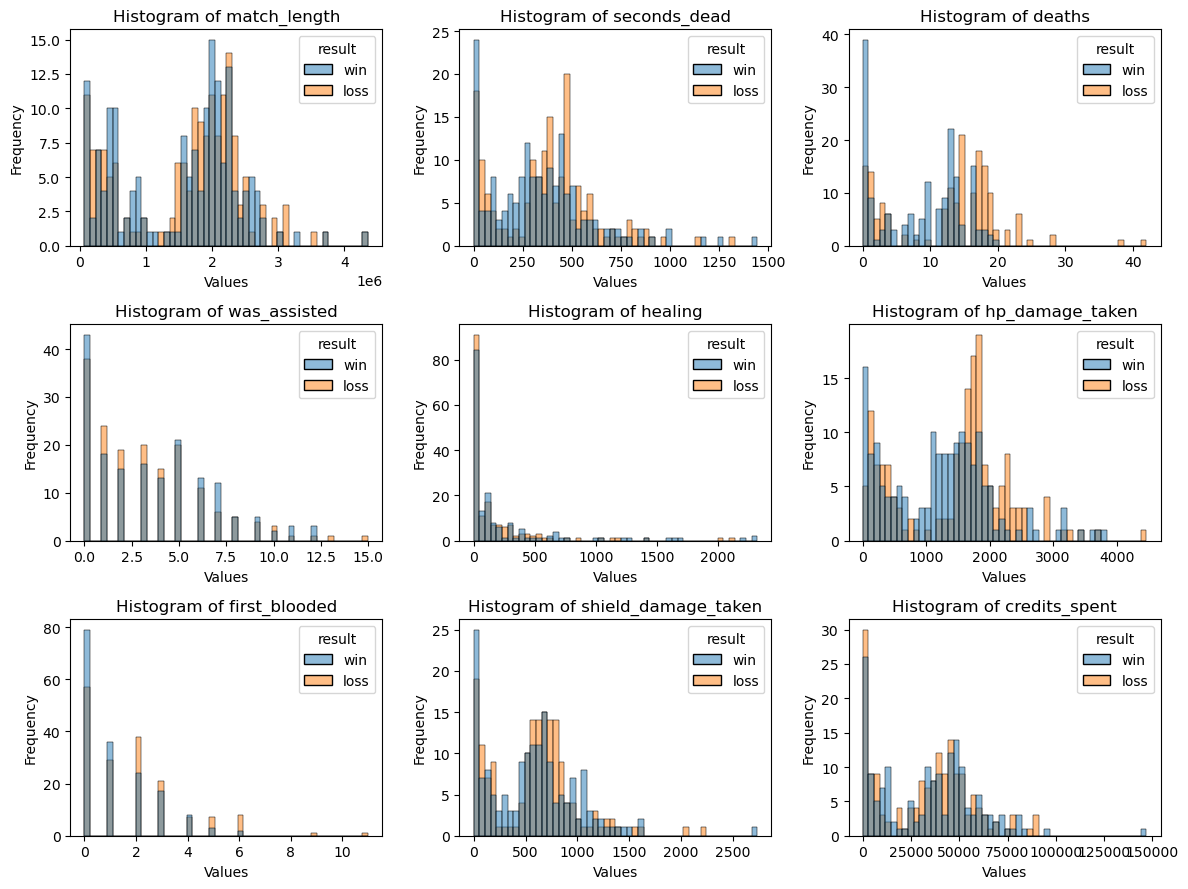

In [361]:
import seaborn as sns

# Specify the class label column
class_label = 'result'
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=downsampled_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [362]:
p_df_1 = downsampled_df[['result','match_length','seconds_alive','elims','assists']]
p_df_2 = downsampled_df[['result','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_df_1 = downsampled_df[['result','match_length','seconds_dead','deaths','was_assisted']]
n_df_2 = downsampled_df[['result','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]



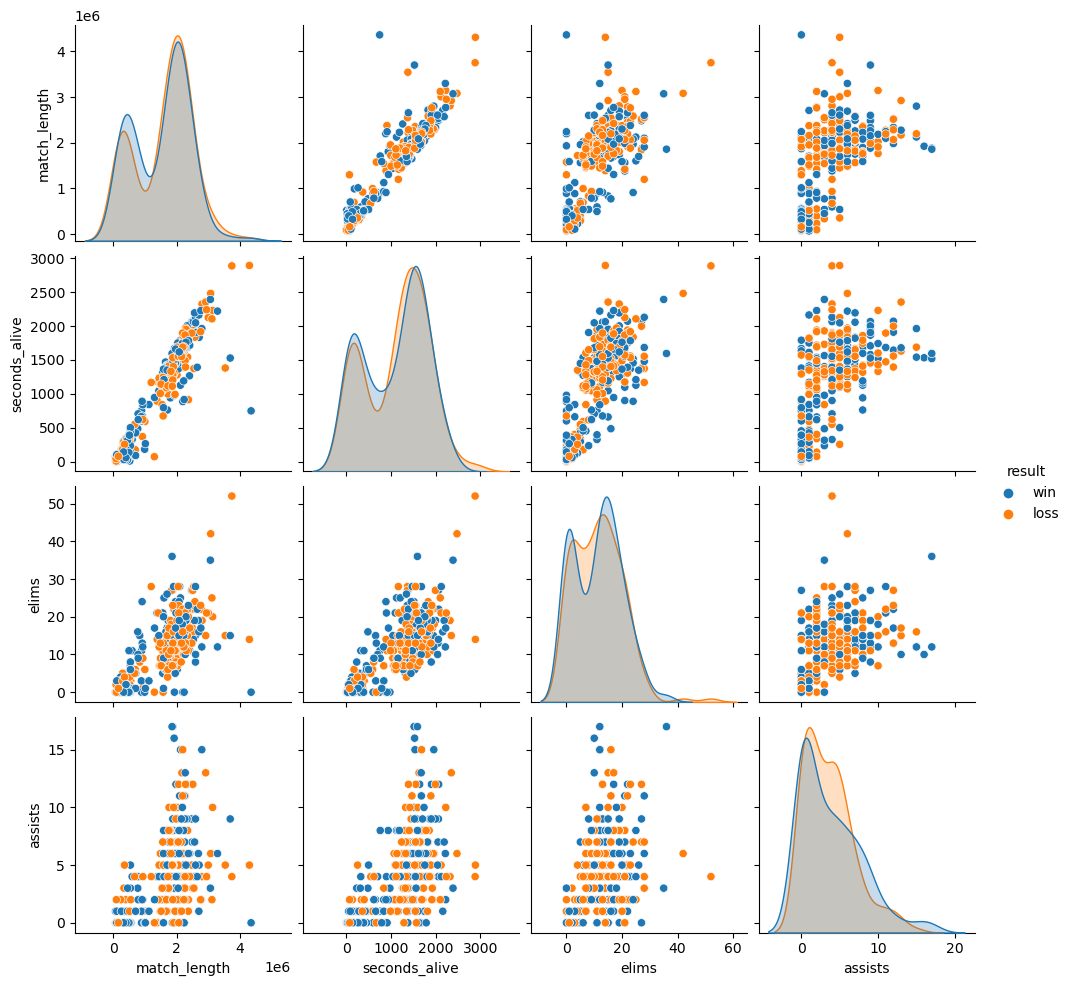

In [363]:
sns.pairplot(p_df_1,hue='result')

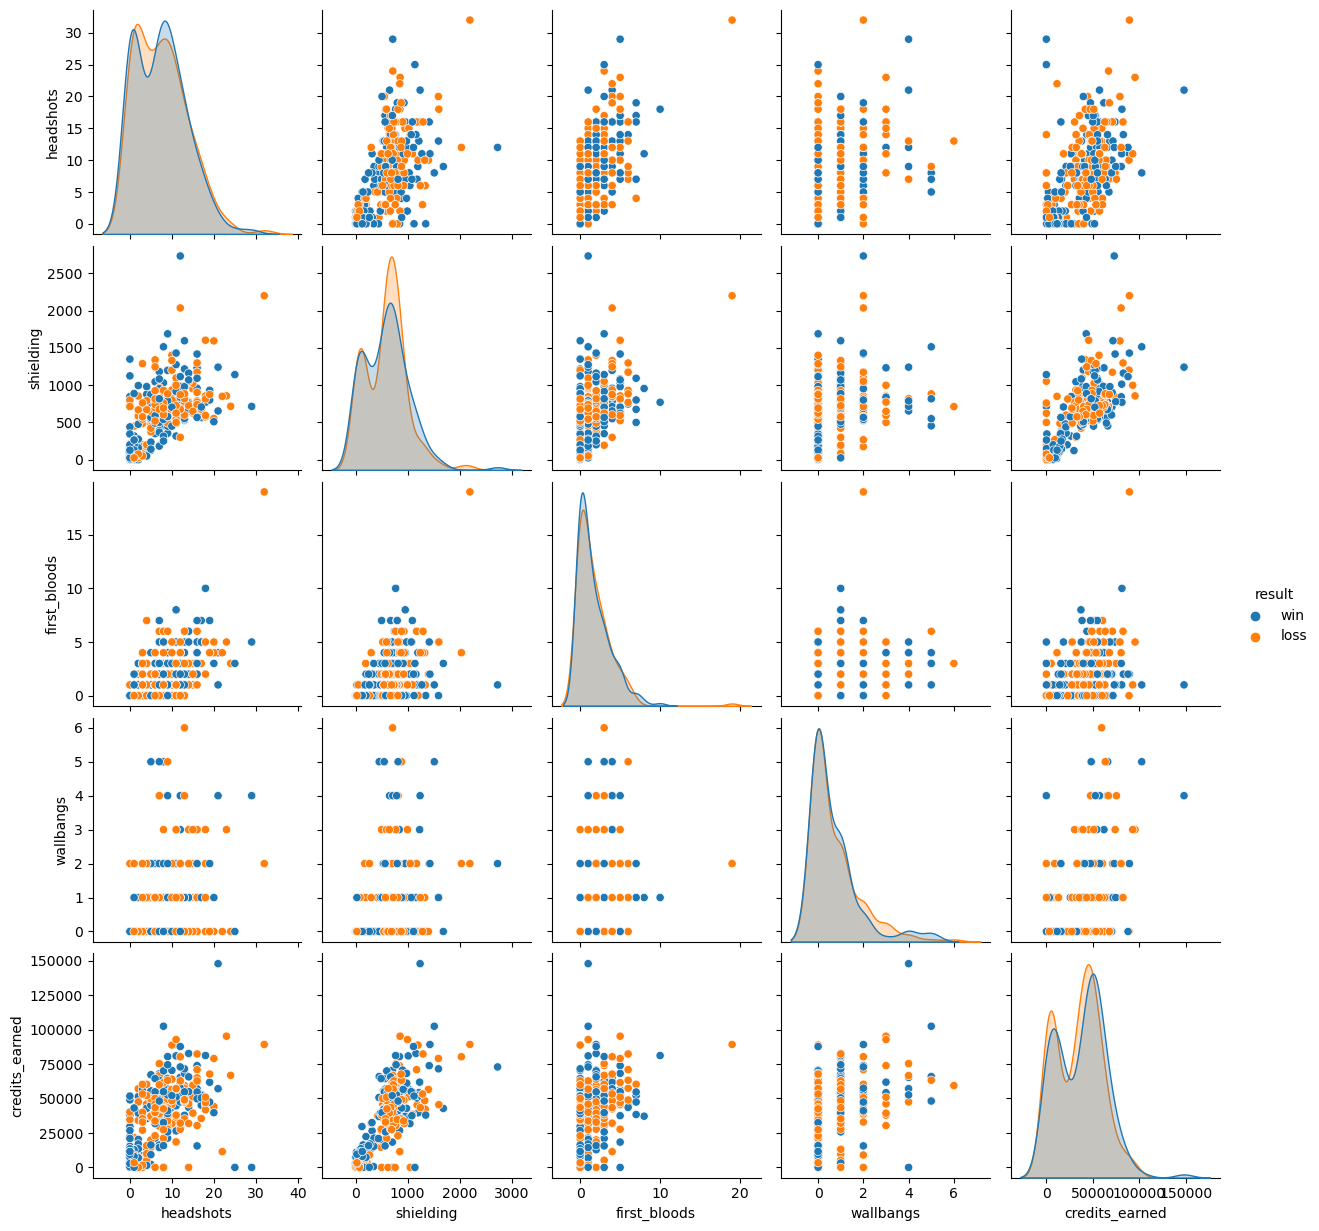

In [364]:
sns.pairplot(p_df_2,hue='result')

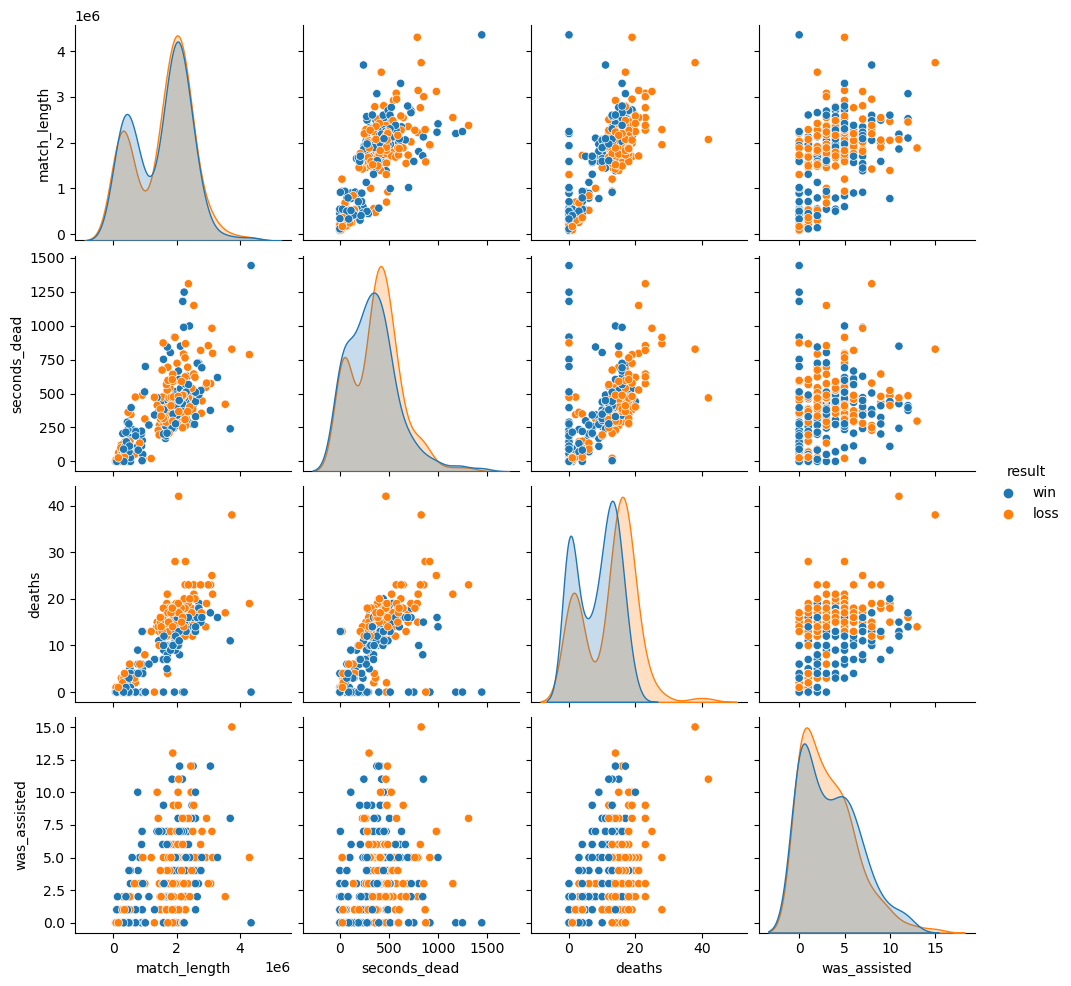

In [365]:
sns.pairplot(n_df_1,hue='result')

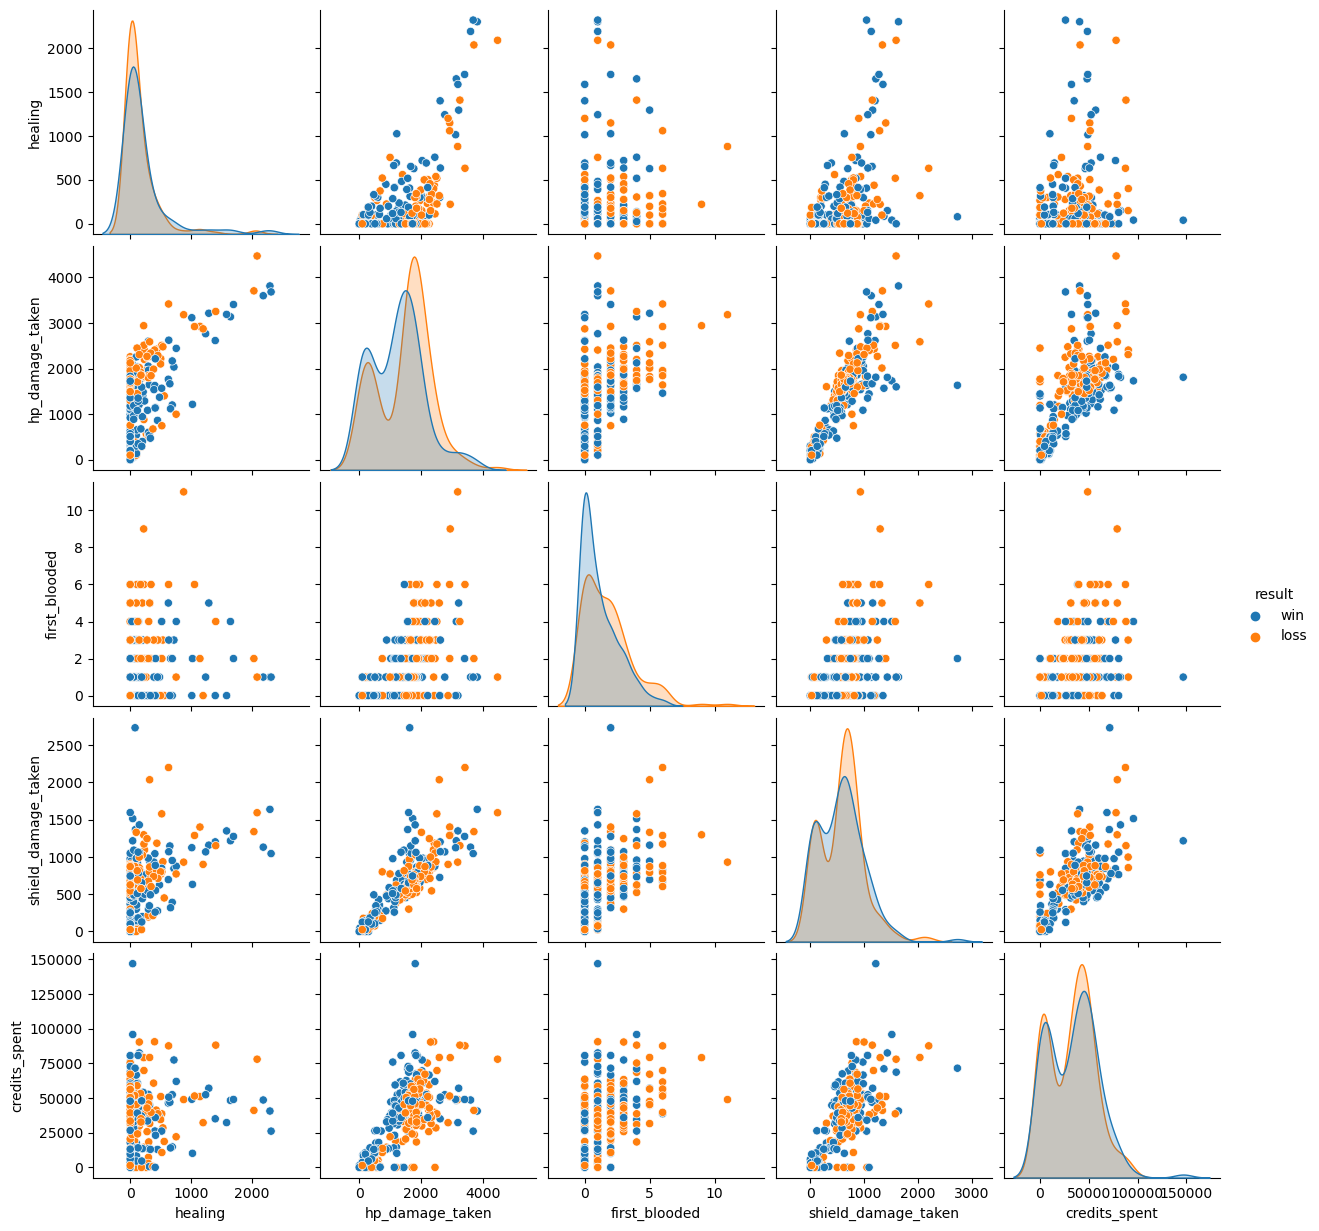

In [366]:
sns.pairplot(n_df_2,hue='result')

## more thoughts
- Initially I thought that clustering would be a good place to start b/c I want to see if I can group similar games (similar in the sense that there are winning games and losing games, or just certain playstyles, etc.)
- But after looking at these features it doesnt really seem "globular" or like blobs which is when I think clustering works well
- gaussian mixture?

## correlation analysis

- some features are obviously correlated, like headshots and elims
- but a lot of them seem not that correlated, like deaths and healing??

In [367]:
corr_df = downsampled_df[['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent','seconds_alive','elims','assists','headshots','shielding','first_bloods','credits_earned']]


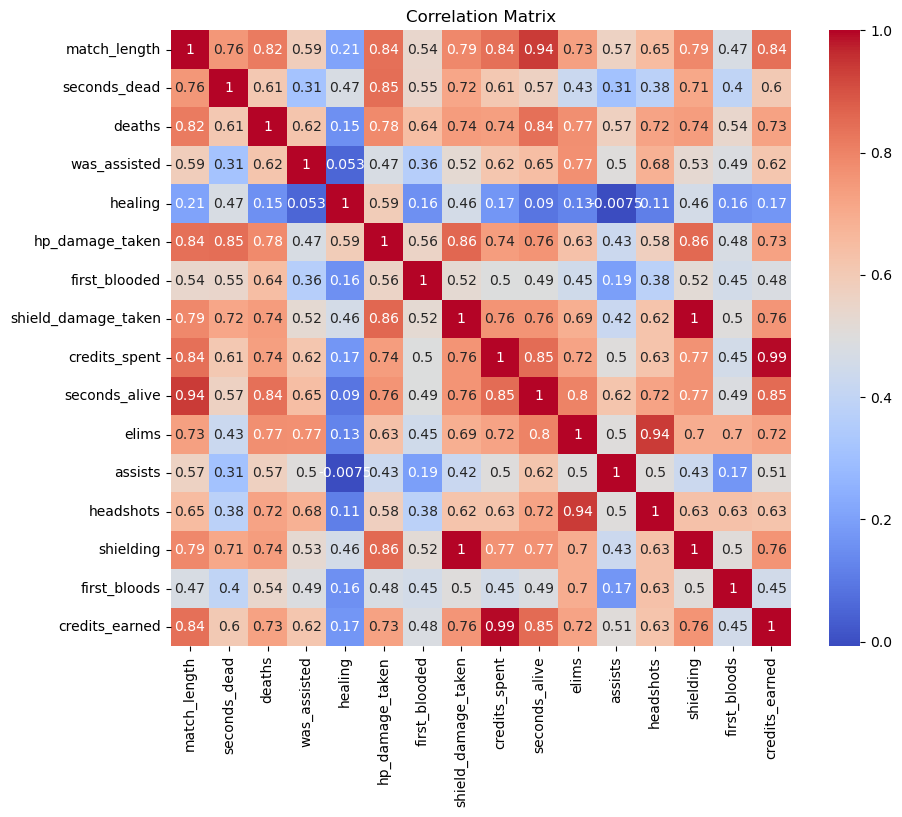

In [368]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 2 users
- taking the top users (about 100 games each) and seeing if the data for those users is the same or not

### thoughts
- definitely seems more seperable (user vs user) than game outcome
- possibly a good sign for classifying different types of gameplay styles?
- similar but not perfect w/l ratios

In [369]:
df

id  map_id                       created_at result  score  \
0    4633     136 2023-05-05 10:04:15.097000+00:00    win   13-3   
1    4631      32 2023-05-05 10:01:25.781000+00:00   loss   9-13   
2    4630      33 2023-05-05 09:59:24.229000+00:00    win   13-4   
3    4613      28 2023-05-05 09:19:39.378000+00:00    win  14-12   
4    4612      32 2023-05-05 09:17:04.490000+00:00    win  13-10   
..    ...     ...                              ...    ...    ...   
529  1466      34 2023-02-27 21:24:45.202000+00:00    win   13-8   
530  1464      31 2023-02-27 21:21:35.997000+00:00    win  14-12   
531  1463     134 2023-02-27 21:19:04.449000+00:00    win  13-11   
532  1462      33 2023-02-27 21:07:02.155000+00:00    win   13-4   
533  1461     134 2023-02-27 21:05:53.784000+00:00    win   13-7   

     character_id  user_id  match_length  start_time  end_time  ...  \
0              42     1006        895000           0    895000  ...   
1            1411     1006       2071000     2135000   4206000  ...   
2              42     1006       1519000      464000   1983000  ...   
3              45     1011       2680000    16735999  19415999  ...   
4              52     1011       2237000    14434999  16671999  ...   
..            ...      ...           ...         ...       ...  ...   
529            48     1010       2037000           0   2037000  ...   
530            35     1011       2506999           0   2506999  ...   
531            35     1011       2376000        4000   2380000  ...   
532            34     1018       1632779     8296875   9929654  ...   
533            40     1018       1676773     6464124   8140897  ...   

     wallbangs  first_bloods  seconds_dead  was_assisted  credits_spent  \
0          0.0           2.0         162.0           3.0        29060.0   
1          3.0           2.0         367.0           1.0        33400.0   
2          0.0           6.0         248.0           9.0        25450.0   
3          0.0           3.0         463.0           4.0        44500.0   
4          0.0           1.0         609.0           6.0        38700.0   
..         ...           ...           ...           ...            ...   
529        1.0           5.0         443.0           7.0        34015.0   
530        1.0           2.0         431.0           8.0        56550.0   
531        2.0           1.0         566.0           6.0        71534.0   
532        0.0           3.0         373.0           1.0        36530.0   
533        1.0           3.0         290.0           6.0        36020.0   

     first_blooded  seconds_alive  credits_earned  hp_damage_taken  \
0              1.0          677.0         33110.0            446.0   
1              1.0         1571.0         39350.0           1688.0   
2              1.0         1233.0         38700.0           1165.0   
3              0.0         2057.0         44750.0           2032.0   
4              6.0         1456.0         41100.0           1914.0   
..             ...            ...             ...              ...   
529            1.0         1578.0         37515.0           1676.0   
530            2.0         2049.0         57350.0           2223.0   
531            2.0         1783.0         72884.0           1632.0   
532            1.0         1231.0         39680.0           1396.0   
533            3.0         1356.0         39720.0           1694.0   

     shield_damage_taken  
0                  170.0  
1                  634.0  
2                  445.0  
3                 1009.0  
4                  817.0  
..                   ...  
529               1050.0  
530                915.0  
531               2732.0  
532               1007.0  
533               1020.0  

[529 rows x 26 columns]

In [370]:
user_2_df = df[(df['user_id'] == 1012) | (df['user_id'] == 1013)]
user_2_df = user_2_df.reset_index(drop=True)

In [371]:
user_2_df

id  map_id                       created_at result  score  \
0    4594     134 2023-05-05 08:06:55.021000+00:00    win  12-10   
1    4593     134 2023-05-05 08:06:32.290000+00:00    win    8-7   
2    4592     134 2023-05-05 08:06:02.001000+00:00   loss    5-6   
3    4590     134 2023-05-05 08:03:34.318000+00:00    win    7-6   
4    4589     134 2023-05-05 08:03:04.597000+00:00    win   11-0   
..    ...     ...                              ...    ...    ...   
193  2578      33 2023-03-27 20:44:50.264000+00:00    win    9-3   
194  2577      33 2023-03-27 20:43:57.740000+00:00    win    6-1   
195  2576      28 2023-03-27 20:42:13.253000+00:00   loss   5-12   
196  2575      28 2023-03-27 20:41:18.556000+00:00   loss    4-9   
197  2574      28 2023-03-27 20:40:25.600000+00:00   loss    3-6   

     character_id  user_id  match_length  start_time  end_time  ...  \
0              44     1013        386000    17749000  18135000  ...   
1              34     1013        472000    17102000  17574000  ...   
2              44     1013        555000    16431000  16986000  ...   
3              44     1013        246000    14702000  14948000  ...   
4              37     1013        486000    13911000  14397000  ...   
..            ...      ...           ...         ...       ...  ...   
193            46     1012        300000     3826000   4126000  ...   
194            37     1012        686000     3103000   3789000  ...   
195            45     1012        332000     2323000   2655000  ...   
196            37     1012        373000     1930000   2303000  ...   
197            38     1012        921000      970000   1891000  ...   

     wallbangs  first_bloods  seconds_dead  was_assisted  credits_spent  \
0          0.0           0.0         114.0           0.0         3270.0   
1          0.0           1.0         208.0           1.0          305.0   
2          0.0           0.0         345.0           0.0         6476.0   
3          0.0           0.0          50.0           0.0         9271.0   
4          0.0           0.0         102.0           0.0         5500.0   
..         ...           ...           ...           ...            ...   
193        0.0           0.0          33.0           0.0         5000.0   
194        0.0           0.0         208.0           0.0        12650.0   
195        0.0           0.0          68.0           0.0         7250.0   
196        0.0           0.0         146.0           1.0         2900.0   
197        0.0           1.0         488.0           0.0        18700.0   

     first_blooded  seconds_alive  credits_earned  hp_damage_taken  \
0              0.0           30.0          7470.0            100.0   
1              0.0           70.0           450.0            141.0   
2              0.0          114.0          6876.0            200.0   
3              0.0           89.0         14371.0            228.0   
4              1.0           30.0          5650.0            100.0   
..             ...            ...             ...              ...   
193            0.0          246.0          8650.0            330.0   
194            0.0          416.0         16500.0            936.0   
195            0.0          205.0          9900.0            500.0   
196            0.0          168.0          3650.0            596.0   
197            0.0          369.0         21650.0           1400.0   

     shield_damage_taken  
0                    8.0  
1                    8.0  
2                  149.0  
3                   60.0  
4                    0.0  
..                   ...  
193                200.0  
194                311.0  
195                195.0  
196                217.0  
197                450.0  

[198 rows x 26 columns]

In [372]:
class_counts = user_2_df.groupby('user_id')['result'].value_counts()
class_counts

user_id  result
1012     win       64
         loss      39
         draw       3
1013     win       58
         loss      24
         draw      10
Name: result, dtype: int64

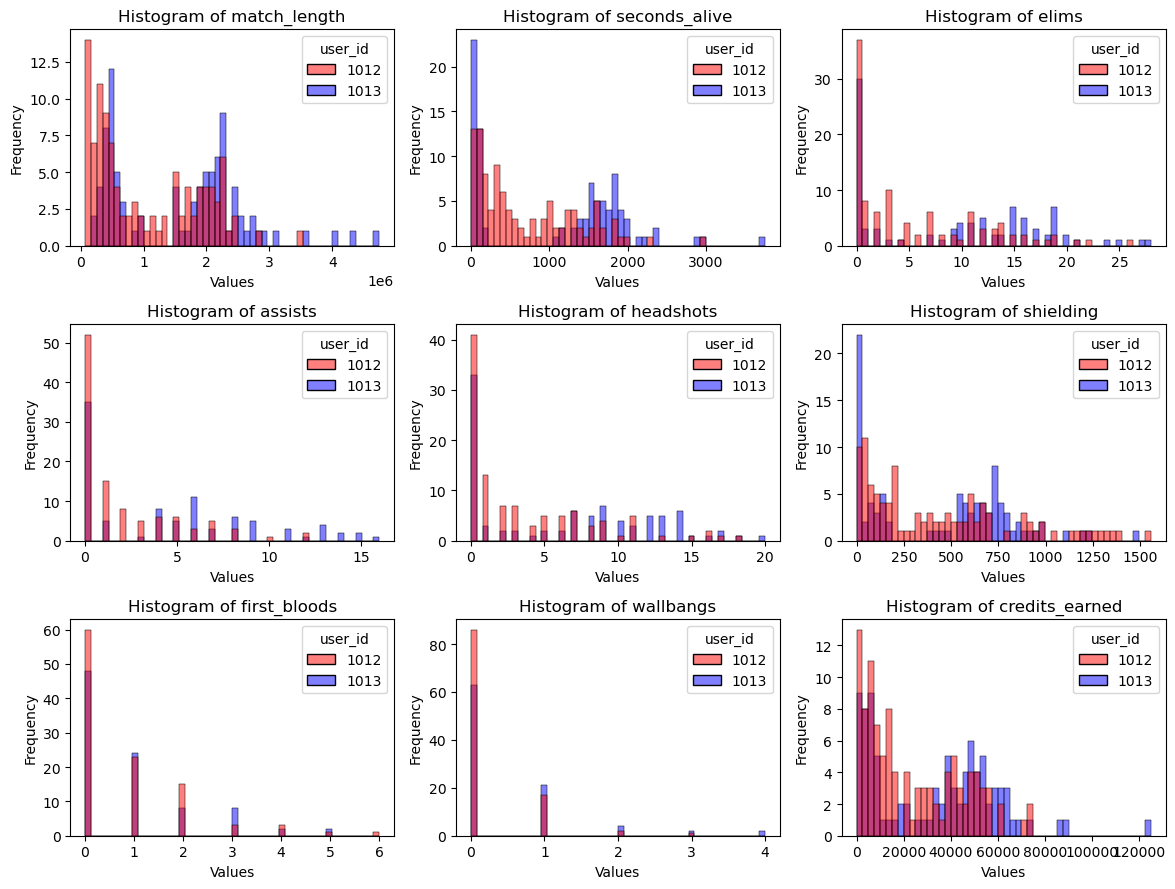

In [373]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['match_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

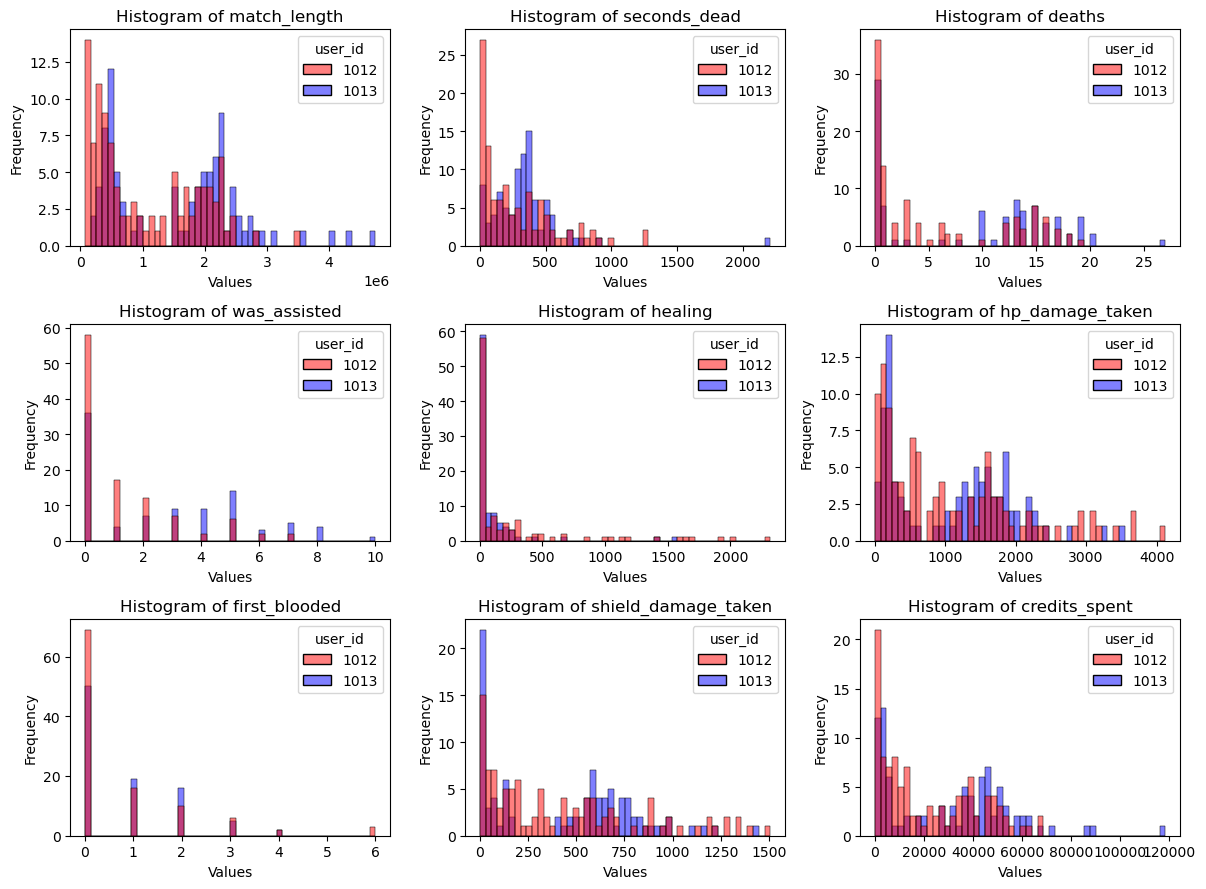

In [374]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['match_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

In [379]:

p_user_2_df_1 = user_2_df[['user_id','match_length','seconds_alive','elims','assists']]
p_user_2_df_2 = user_2_df[['user_id','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_user_2_df_1 = user_2_df[['user_id','match_length','seconds_dead','deaths','was_assisted']]
n_user_2_df_2 = user_2_df[['user_id','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]


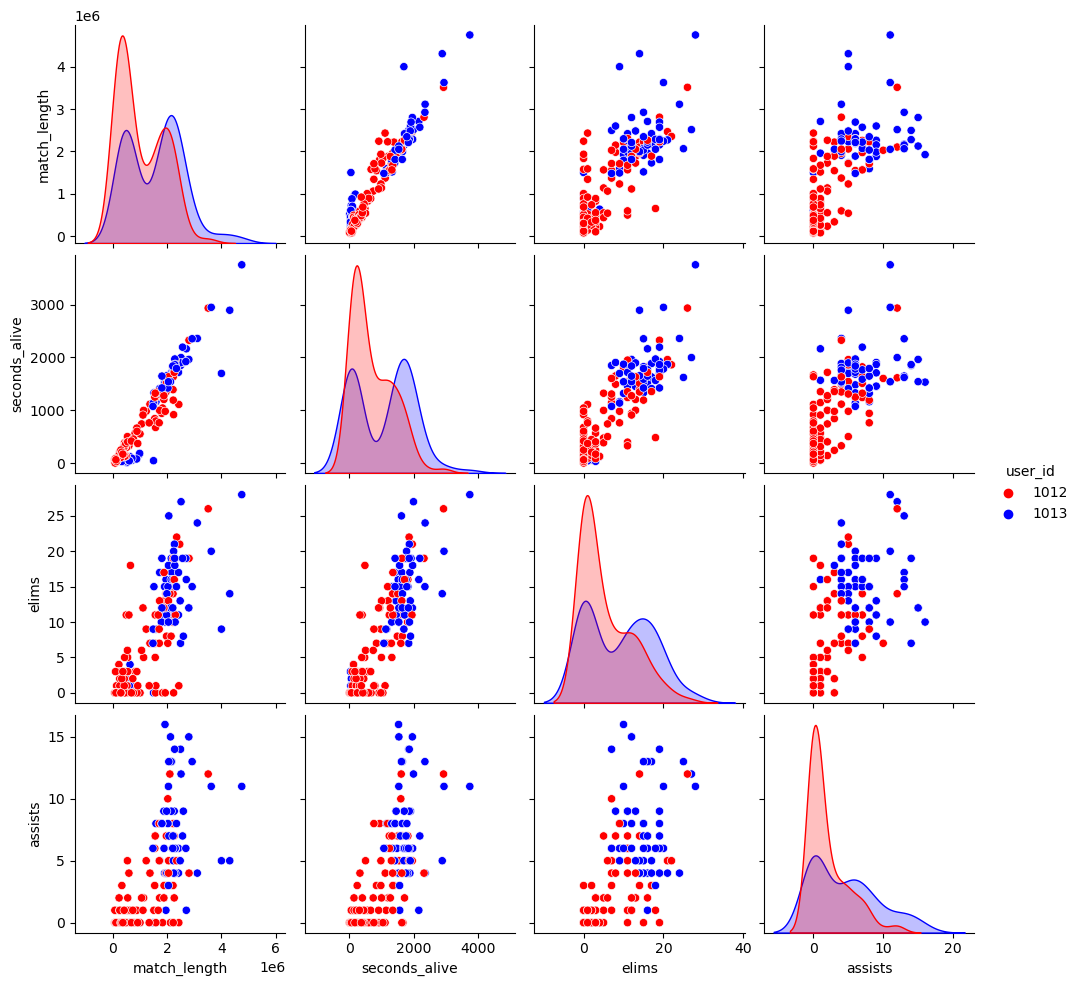

In [380]:
sns.pairplot(p_user_2_df_1,hue='user_id', palette=custom_palette)

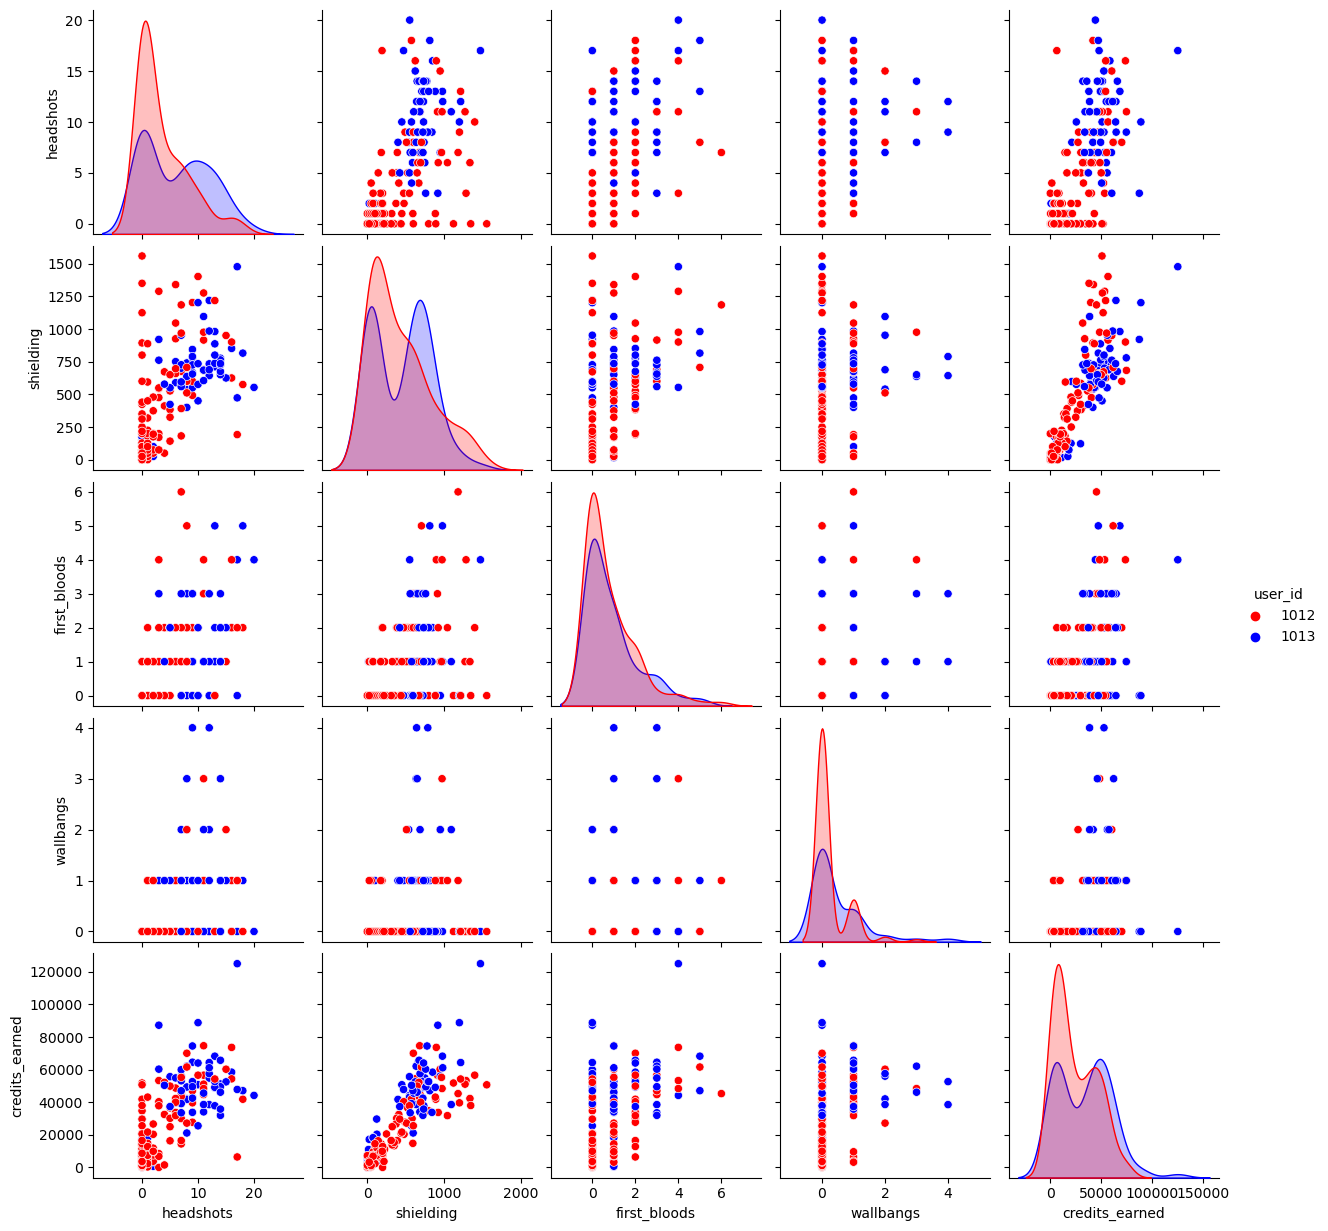

In [381]:
sns.pairplot(p_user_2_df_2,hue='user_id', palette=custom_palette)

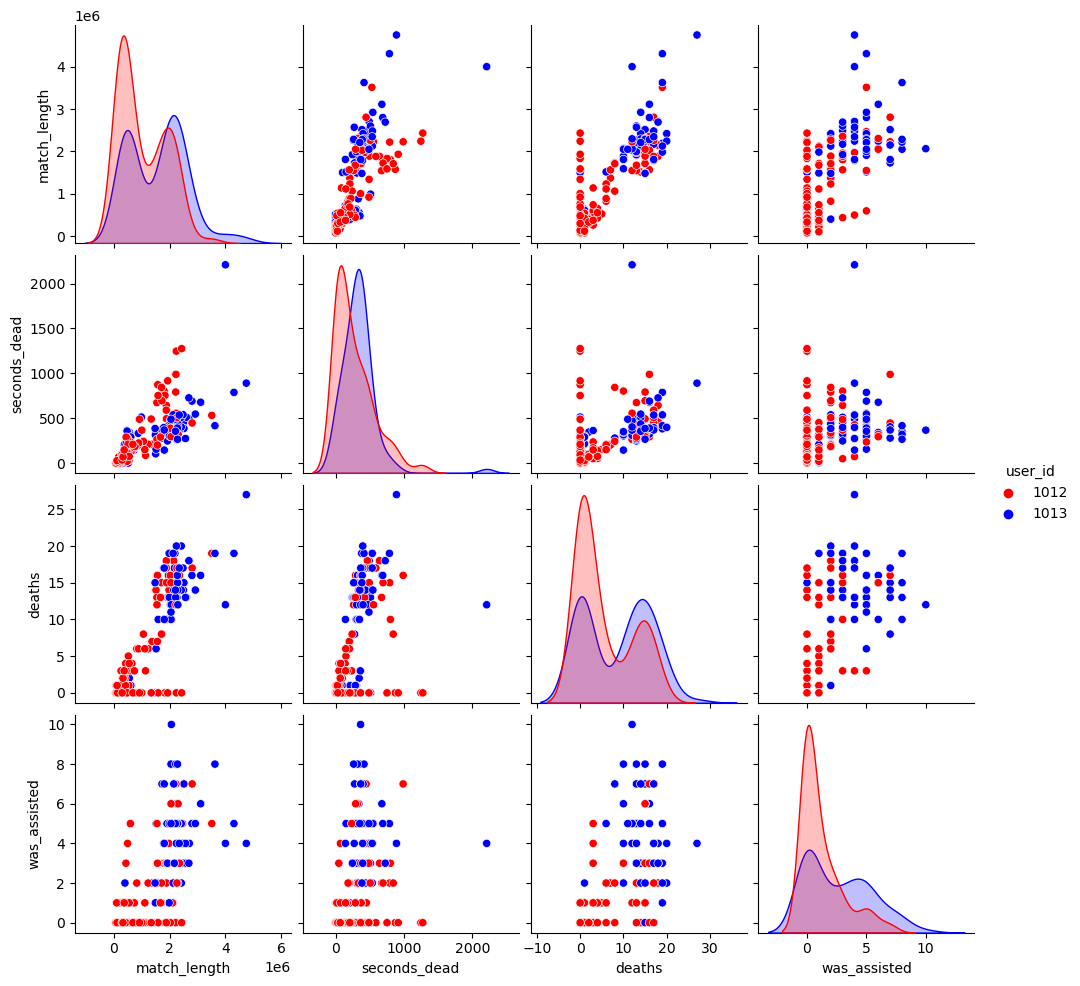

In [382]:
sns.pairplot(n_user_2_df_1,hue='user_id', palette=custom_palette)

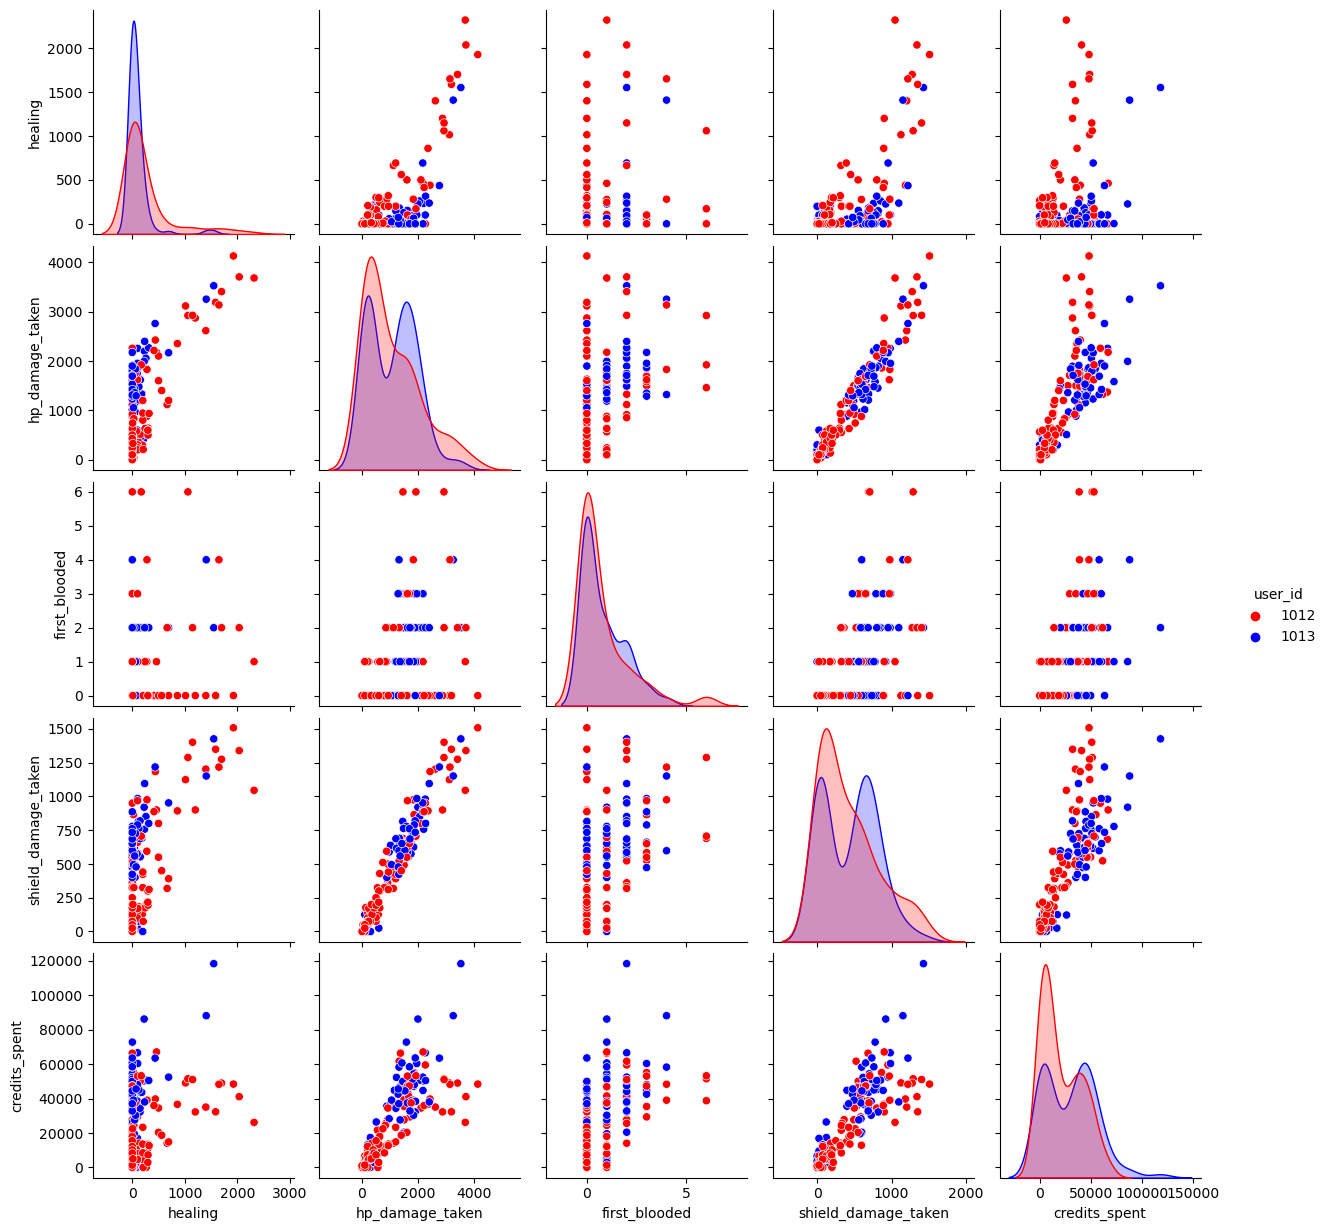

In [383]:
sns.pairplot(n_user_2_df_2,hue='user_id', palette=custom_palette)

## PCA

-numerical, results


In [416]:
numerical_df = df[['match_length','seconds_dead','deaths','was_assisted','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']]
numerical_df

match_length  seconds_dead  deaths  was_assisted  healing  \
0          895000         162.0     3.0           3.0     23.0   
1         2071000         367.0    17.0           1.0      0.0   
2         1519000         248.0     8.0           9.0    320.0   
3         2680000         463.0    12.0           4.0      4.0   
4         2237000         609.0    16.0           6.0    164.0   
..            ...           ...     ...           ...      ...   
524       2037000         443.0    11.0           7.0      0.0   
525       2506999         431.0    19.0           8.0    289.0   
526       2376000         566.0    16.0           6.0     80.0   
527       1632779         373.0    14.0           1.0     50.0   
528       1676773         290.0    20.0           6.0     75.0   

     hp_damage_taken  first_blooded  shield_damage_taken  credits_spent  \
0              446.0            1.0                170.0        29060.0   
1             1688.0            1.0                634.0        33400.0   
2             1165.0            1.0                445.0        25450.0   
3             2032.0            0.0               1009.0        44500.0   
4             1914.0            6.0                817.0        38700.0   
..               ...            ...                  ...            ...   
524           1676.0            1.0               1050.0        34015.0   
525           2223.0            2.0                915.0        56550.0   
526           1632.0            2.0               2732.0        71534.0   
527           1396.0            1.0               1007.0        36530.0   
528           1694.0            3.0               1020.0        36020.0   

     seconds_alive  elims  assists  headshots  shielding  first_bloods  \
0            677.0    9.0      2.0        6.0      220.0           2.0   
1           1571.0   21.0      0.0       15.0      648.0           2.0   
2           1233.0   32.0      3.0       17.0      519.0           6.0   
3           2057.0   14.0     12.0       10.0     1009.0           3.0   
4           1456.0   15.0      6.0       10.0      817.0           1.0   
..             ...    ...      ...        ...        ...           ...   
524         1578.0   12.0      9.0        7.0     1083.0           5.0   
525         2049.0   24.0      8.0       15.0      939.0           2.0   
526         1783.0   23.0      6.0       12.0     2732.0           1.0   
527         1231.0   11.0      6.0        8.0     1007.0           3.0   
528         1356.0   17.0     18.0        9.0     1020.0           3.0   

     wallbangs  credits_earned  
0          0.0         33110.0  
1          3.0         39350.0  
2          0.0         38700.0  
3          0.0         44750.0  
4          0.0         41100.0  
..         ...             ...  
524        1.0         37515.0  
525        1.0         57350.0  
526        2.0         72884.0  
527        0.0         39680.0  
528        1.0         39720.0  

[529 rows x 17 columns]

In [417]:
nan_rows = df[df.isna().any(axis=1)]

nan_rows

Empty DataFrame
Columns: [index, id, map_id, created_at, result, score, character_id, user_id, match_length, start_time, end_time, elims, deaths, assists, healing, headshots, shielding, wallbangs, first_bloods, seconds_dead, was_assisted, credits_spent, first_blooded, seconds_alive, credits_earned, hp_damage_taken, shield_damage_taken]
Index: []

[0 rows x 27 columns]

In [428]:
from sklearn.decomposition import PCA

n_components = 2  # number of principal components
pca = PCA(n_components=n_components)

pca.fit(numerical_df)

transformed_data = pca.transform(numerical_df)

# dataframe to hold the transformed data
columns = [f"PC{i+1}" for i in range(n_components)]
transformed_df = pd.DataFrame(transformed_data, columns=columns)

transformed_df

PC1           PC2
0   -6.468106e+05  16858.356005
1    5.288221e+05 -13509.744627
2   -2.308509e+04  -1704.376456
3    1.137880e+06 -21544.357473
4    6.948954e+05 -13925.106534
..            ...           ...
524  4.948114e+05 -13308.118863
525  9.655307e+05   1453.287515
526  8.352955e+05  27256.300828
527  9.090628e+04   3011.844454
528  1.348672e+05   1272.080087

[529 rows x 2 columns]

In [434]:
# one-hot encode the class column
class_one_hot = pd.get_dummies(df['result'], prefix='result')
class_one_hot

result_draw  result_loss  result_win
0              0            0           1
1              0            1           0
2              0            0           1
3              0            0           1
4              0            0           1
..           ...          ...         ...
524            0            0           1
525            0            0           1
526            0            0           1
527            0            0           1
528            0            0           1

[529 rows x 3 columns]

In [435]:
combine_df = pd.concat([transformed_df, class_one_hot], axis=1)
combine_df

PC1           PC2  result_draw  result_loss  result_win
0   -6.468106e+05  16858.356005            0            0           1
1    5.288221e+05 -13509.744627            0            1           0
2   -2.308509e+04  -1704.376456            0            0           1
3    1.137880e+06 -21544.357473            0            0           1
4    6.948954e+05 -13925.106534            0            0           1
..            ...           ...          ...          ...         ...
524  4.948114e+05 -13308.118863            0            0           1
525  9.655307e+05   1453.287515            0            0           1
526  8.352955e+05  27256.300828            0            0           1
527  9.090628e+04   3011.844454            0            0           1
528  1.348672e+05   1272.080087            0            0           1

[529 rows x 5 columns]

Explained Variance Ratio: [9.99575157e-01 4.20128790e-04]
Principal Components:
PC1: [9.99480529e-01 2.38893168e-04 6.32562292e-06 2.04186074e-06
 9.94111227e-05 7.98833979e-04 9.37057903e-07 3.51467700e-04
 2.24047238e-02 7.18987732e-04 6.87979941e-06 2.34941946e-06
 4.34525336e-06 3.54974865e-04 1.05808621e-06 4.30035326e-07
 2.31350163e-02]
PC2: [-3.22127398e-02 -5.92140305e-04  3.89683380e-05  3.33877951e-05
  3.04466383e-04  2.92359844e-03  5.08552835e-06  4.14778950e-03
  6.92232060e-01  4.52813324e-03  9.90409886e-05  9.29461947e-06
  4.88317199e-05  4.28708940e-03  1.01874975e-05  1.07612506e-05
  7.20910550e-01]


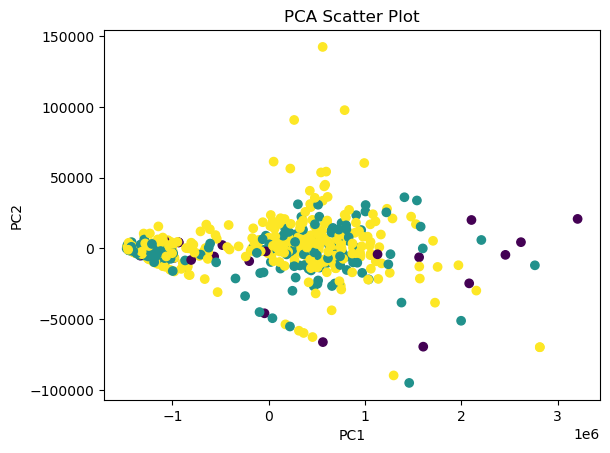

In [442]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# principal components 
principal_components = pca.components_
print("Principal Components:")
for i, component in enumerate(principal_components):
    print(f"PC{i+1}: {component}")

# plot the transformed data with different colors for each class
class_labels = combine_df[['result_draw', 'result_loss', 'result_win']].idxmax(axis=1)
class_codes = class_labels.astype('category').cat.codes
plt.scatter(combine_df['PC1'], combine_df['PC2'], c=class_codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

## PCA

-numerical, user?


## next steps:
- look for more aggregates in the time series data (like ability usage)
- look for other filters/categorical attributes in the data (like gun/weapon type)
- outlier detection?
- what to do about half matches...
- Gaussian mixture models?

## other ideas
- Elo Rating System
- using time series info to fill in gaps in data for half matches?